<div style="text-align:center">
    
# Examining Unemployment and Education in the United States

### Mt. SAC CISD 41 Capstone Project Fall 2021

#### By
    
#### Paul Sandeen, "Fiona" Ping Xu, Ping Ju 
    
</div>


## Introduction

This project examines the connection between unemployment and education level on a county-by-county basis in all 50 states in the United States of America. The data for unemployment and education will first be evaluated separately, then combined together to look for correlations in education level and unemployment.

A step-by-step methodology will be taken to import the data, inspect the data, clean the data, perform an exploratory data analysis, graph the data, and apply statistical methods to analyze the data. All procedures will be performed with the Python programming language and associated libraries.

## Intended Audience

This project is intended for students, educators, and anyone interested in a deeper understanding in how education and unemployment are associated in the United States. The ability to read and understand computer programs written in Python is required. Familiarity with fundamental statistical concepts and the ability to interpret graphs is assumed.

## Tools Used

This project uses the Python programming language running in the Anaconda environment. 

Associated Python libraries used for data analysis: Numpy, pandas, Matplotlib, Seaborn.

The project was composed as a Jupyter Notebook.

## DataSet Source

The original dataset for both education level and unemployment is located at:

"USA Unemployment & Education Level"

https://www.kaggle.com/valbauman/student-engagement-online-learning-supplement/version/3?select=UIC_codes.csv

The dataset is maintained by: Val Bauman

The files used for the project: UIC_codes.csv, education.csv, unemployment.csv

## Definitions

The terms City, Suburb, Town and Rural areas are defined as follows:

City is a large town, and it usually has the largest civilian labor force. The dataset provider described city as large-in a metro area with at least 1 million residents or more.

Suburb is the residential area of city or town, and it usually has the second largest civilian labor force; it is a micropolitan area adjacent to a large metro area.

Town is usually describing an urban area which is bigger than a village, but it is smaller than a city. A town is a noncore area adjacent to a small metro with a population of at least 2,500 residents.

Rural areas are characterized by a large open land, countryside or farming community. Rural areas are often on the outskirts of  a large metro area.

## Asking the appropriate questions

This project will attempt to answer the following questions:

1\. A charity organization wants to explore which communities have residents that need help in completing their high school education. Which communities should they look at to do the most good? (Paul)

2\. Even with states having low or moderate unemployment rates, are there counties with unusually high or low unemployment? (Paul)

3\. Does having a bachelor's degree (or higher) or just a high school diploma correlate better with low unemployment? (Paul)

4\. Which years have the highest and lowest unemployment rate over the course of 21 years? (Fiona)

5\.  Which states contribute the most and the least for the unemployment change from year 2019 to 2020? (Fiona)

6\. Is there a significant change regarding percentages of people completing different diplomas between year 2000 and year 2015-2019? (Fiona)

7\. What is the correlation between the adults with less than a high school diploma and unemployment rate in the year 2000? (Ping)

8\. What will happen if the adults complete some college or complete a bachelor's degree or higher in the year 2000? (Ping)

9\. How has the civilian labor force changed in City/Suburb/Town/Rural areas from 2000, 2010 and 2020? (Ping)


## Import the Required Libraries


In [1]:
# Import the numpy and pandas libraries for data analysis methods
import numpy as np
import pandas as pd

# Import the Matplotlib and Seaborn libraries to create plots
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries required for Choropleth Map plots
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Import the warnings library and disable warnings from being printed in the Jupyter notebook
import warnings
warnings.filterwarnings('ignore')

# Display plots inside the Jupypter nodebook
%matplotlib inline

# Import the Z-test libraries used for statistical analysis
from statsmodels.stats.weightstats import ztest

# Import the Python Scipy Statistics library
import scipy.stats as stats

# Import the SciPy Pearson r module
from scipy.stats import pearsonr

# Imprt the libraries for the Chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


## Import the Data

In [2]:
# Import the unemployment data from the unemployment.csv file
df_unemployment = pd.read_csv('data/unemployment.csv', sep=',')

# Import the education data from the education.csv file
df_education = pd.read_csv('data/education.csv', sep=',')

# Import the UIC data from the UIC_codes.csv file
df_uic = pd.read_csv('data/UIC_codes.csv', sep=',')

## Inspect data (head, tail, info, dtype, etc.)


In [3]:
# Examine the data present in df_unemployment DataFrame using shape and info()
print('unemployement.csv:')
print('shape (rows, columns):', df_unemployment.shape, '\n')
print(df_unemployment.info(verbose=True, null_counts=True))

unemployement.csv:
shape (rows, columns): (3275, 93) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_Code                                  3275 non-null   int64  
 1   State                                      3275 non-null   object 
 2   Area_name                                  3275 non-null   object 
 3   Rural_urban_continuum_code_2013            3219 non-null   float64
 4   Urban_influence_code_2013                  3219 non-null   float64
 5   City/Suburb/Town/Rural                     3219 non-null   object 
 6   Metro_2013                                 3222 non-null   float64
 7   Civilian_labor_force_2000                  3270 non-null   object 
 8   Employed_2000                              3270 non-null   object 
 9   Unemployed_2000                          

**Conclusion:** The unemployment dataset has 93 columns and 3,275 rows of data. With so much data to work with, finding interesting patterns should not be a problem. The problem is that numerical data (such as the number of people unemployed in the year 2000) is stored as an object (a Python string), not as an integer or float. The data will have to be converted from strings to numbers to be usable.

Also, the column names have an underscore character (_) which should be removed.

In [4]:
# Display the first five rows of df_unemployment
df_unemployment.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,...,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,...,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,...,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",...,"316,802","307,648","9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,"31,555","30,359","1,196",...,"40,698","39,591","1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3


In [5]:
# Examine the data present in df_education DataFrame using shape and info()
print('education.csv:')
print('shape (rows, columns):', df_education.shape, '\n')
print(df_education.info(verbose=True, null_counts=True))

education.csv:
shape (rows, columns): (3283, 48) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 48 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2003 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2003 Urban Influence Code                                                 3221 non-null   float64
 5   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 6   2013 Urban In

 **Conclusion:** Much like the Unemployment dataset, the Education dataset has a lot of data (48 columns and 3285 rows). And again, much of the numeric data is stored as type object (a Python string) not an integer or float, so type conversion will be needed.

In [6]:
# Display the first five rows of df_education
df_education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",...,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",...,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",...,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656",...,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",...,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1


In [7]:
# Display the first five rows of df_UIC
df_uic.head()

,FIPS,State,County_Name,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural
0,1007,AL,Bibb County,"22,915",1,Large-in a metro area with at least 1 million ...,City
1,1009,AL,Blount County,"57,322",1,Large-in a metro area with at least 1 million ...,City
2,1021,AL,Chilton County,"43,643",1,Large-in a metro area with at least 1 million ...,City
3,1073,AL,Jefferson County,"658,466",1,Large-in a metro area with at least 1 million ...,City
4,1115,AL,St. Clair County,"83,593",1,Large-in a metro area with at least 1 million ...,City


In [8]:
# Examine the df_uic DataFrame using shape and info()
print('UIC.csv:')
print('shape (rows, columns):', df_uic.shape, '\n')
print(df_uic.info(verbose=True, null_counts=True))

UIC.csv:
shape (rows, columns): (3221, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FIPS                    3221 non-null   int64 
 1   State                   3221 non-null   object
 2   County_Name             3221 non-null   object
 3   Population_2010         3221 non-null   object
 4   UIC_2013                3221 non-null   int64 
 5   Description             3221 non-null   object
 6   City/Suburb/Town/Rural  3221 non-null   object
dtypes: int64(2), object(5)
memory usage: 176.3+ KB
None


**Conclusion:** The UIC.csv file does not contain much information that can be used for the project. The FIPS (Federal Information Processing System) codes are used to give a unique identification to a specific geographic area. The FIPS codes are contained in the other files to identify counties in the U.S. states.

## Organizing data

In [9]:
# Function #1
# The df_unemployment and df_education DataFrames contains data from 
# Puerto Rico (PR) and District of Columbia (DC).
# Ensure the data is only from the 50 US states
def fifty_states(df):
    states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
              'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO',
              'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
              'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
    df_temp = df[df['State'].isin(states)]
    return df_temp

In [10]:
# Remove rows that are not from one of the 50 US states
df_unemployment_clean = fifty_states(df_unemployment)
# Set the index to FIPS code ()
df_unemployment_clean.set_index('FIPS_Code')


,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
FIPS_Code,,,,,,,,,,,,,,,,,,,,,
1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,5.4,...,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,3.5,...,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,4.3,...,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",4.0,...,"316,802","307,648","9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6
1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,"31,555","30,359","1,196",3.8,...,"40,698","39,591","1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51000,VA,Virginia,NaN,NaN,NaN,NaN,"3,606,390","3,524,481","81,909",2.3,...,"4,427,338","4,308,622","118,716",2.7,"4,346,644","4,075,237","271,407",6.2,"76,471",100.0
53000,WA,Washington,NaN,NaN,NaN,NaN,"3,087,680","2,929,824","157,856",5.1,...,"3,909,319","3,747,162","162,157",4.1,"3,914,869","3,585,782","329,087",8.4,"78,674",100.0
54000,WV,West Virginia,NaN,NaN,NaN,NaN,"799,081","754,457","44,624",5.6,...,"798,289","758,989","39,300",4.9,"792,156","726,023","66,133",8.3,"48,659",100.0


In [11]:
# Remove rows that are not from one of the 50 US states
df_education_clean = fifty_states(df_education)
# Set the index to FIPS code ()
df_education_clean.set_index('FIPS Code')


,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
FIPS Code,,,,,,,,,,,,,,,,,,,,,
1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",238,...,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",626,...,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",538,...,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656","32,182",...,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",666,...,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51560,VA,Clifton Forge city,6.0,6.0,NaN,NaN,NaN,"1,505","1,220",307,...,29.0,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53000,WA,Washington,NaN,NaN,NaN,NaN,NaN,"666,656","661,800","265,140",...,34.4,27.7,"442,449","1,122,330","1,699,233","1,837,612",8.7,22.0,33.3,36.0
54000,WV,West Virginia,NaN,NaN,NaN,NaN,NaN,"566,026","267,165","70,605",...,21.0,14.8,"168,624","519,091","334,314","265,398",13.1,40.3,26.0,20.6


## Clean data if required (recall replacing null values)

In [12]:
# Comment: There are many issues associated when choosing to drop rows or backfill missing 
# data with a calculated value such as mean or median. Large states like California and 
# New York will introduce bias when used to fill values from smaller states like Alaska 
# and Hawaii, so simply dropping the rows containing missing data introduced the least amount of bias. 
# Remove rows from df_unemployment that have empty cells
df_unemployment_clean.dropna(inplace=True)
# Remove Rows from df_unemployment that have empty cells
df_education_clean.dropna(inplace=True)

## Rename any column that is not named correctly

In [13]:
# Rename the df_unemployment column FIPS_Code to FIPS Code to make it consistent with df_education
#df_unemployment_clean.rename(columns={"FIPS_Code":"FIPS Code"}, inplace=True)
df_unemployment_clean.columns = df_unemployment_clean.columns.str.replace("_", " ")


In [14]:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
# Rename the colunms of df_education to make them more consistent with previous columns' naming convention
# Note: It is unclear if "Four years of college or higher" in prevous columns meant having attained any degree,
# so degree status was not included.

df_education_clean.rename(columns={"Less than a high school diploma, 1970":"< HS Diploma, 1970",
                            "High school diploma only, 1970":"HS Diploma, 1970",
                            "Some college (1-3 years), 1970":"Some college, 1970",
                            "Four years of college or higher, 1970":">= Bachelors, 1970",
                            "Percent of adults with less than a high school diploma, 1970":"% < HS Diploma, 1970",
                            "Percent of adults with a high school diploma only, 1970":"% HS Diploma, 1970",
                            "Percent of adults completing some college (1-3 years), 1970":"% Some College, 1970",
                            "Percent of adults completing four years of college or higher, 1970":"% >= Bachelors, 1970"},
                            inplace=True)

df_education_clean.rename(columns={"Less than a high school diploma, 1980":"< HS Diploma, 1980",
                            "High school diploma only, 1980":"HS Diploma, 1980",
                            "Some college (1-3 years), 1980":"Some college, 1980",
                            "Four years of college or higher, 1980":">= Bachelors, 1980",
                            "Percent of adults with less than a high school diploma, 1980":"% < HS Diploma, 1980",
                            "Percent of adults with a high school diploma only, 1980":"% HS Diploma, 1980",
                            "Percent of adults completing some college (1-3 years), 1980":"% Some College, 1980",
                            "Percent of adults completing four years of college or higher, 1980":"% >= Bachelors, 1980"},
                            inplace=True)

df_education_clean.rename(columns={"Less than a high school diploma, 1990":"< HS Diploma, 1990",
                            "High school diploma only, 1990":"HS Diploma, 1990",
                            "Some college or associate's degree, 1990":"Some college, 1990",
                            "Bachelor's degree or higher, 1990":">= Bachelors, 1990",
                            "Percent of adults with less than a high school diploma, 1990":"% < HS Diploma, 1990",
                            "Percent of adults with a high school diploma only, 1990":"% HS Diploma, 1990",
                            "Percent of adults completing some college or associate's degree, 1990":"% Some College, 1990",
                            "Percent of adults with a bachelor's degree or higher, 1990":"% >= Bachelors, 1990"},
                            inplace=True)

df_education_clean.rename(columns={"Less than a high school diploma, 2000":"< HS Diploma, 2000",
                            "High school diploma only, 2000":"HS Diploma, 2000",
                            "Some college or associate's degree, 2000":"Some college, 2000",
                            "Bachelor's degree or higher, 2000":">= Bachelors, 2000",
                            "Percent of adults with less than a high school diploma, 2000":"% < HS Diploma, 2000",
                            "Percent of adults with a high school diploma only, 2000":"% HS Diploma, 2000",
                            "Percent of adults completing some college or associate's degree, 2000":"% Some College, 2000",
                            "Percent of adults with a bachelor's degree or higher, 2000":"% >= Bachelors, 2000"},
                            inplace=True)

df_education_clean.rename(columns={"Less than a high school diploma, 2015-19":"< HS Diploma, 2015-19",
                            "High school diploma only, 2015-19":"HS Diploma, 2015-19",
                            "Some college or associate's degree, 2015-19":"Some college, 2015-19",
                            "Bachelor's degree or higher, 2015-19":">= Bachelors, 2015-19",
                            "Percent of adults with less than a high school diploma, 2015-19":"% < HS Diploma, 2015-19",
                            "Percent of adults with a high school diploma only, 2015-19":"% HS Diploma, 2015-19",
                            "Percent of adults completing some college or associate's degree, 2015-19":"% Some College, 2015-19",
                            "Percent of adults with a bachelor's degree or higher, 2015-19":"% >= Bachelors, 2015-19"},
                            inplace=True)



## Change any data type if required


In [15]:
# Remove the ',' character from 'Civilian_labor_force_20xx', 'Employed_20xx', 'Unemployed_20xx' columns
# of df_unemployment and convert to a dtype float  

# Create a list of column headers that contain string data to convert to dtype float
column_to_clean = ['Civilian labor force', 'Employed','Unemployed']

# Iterate through all of the columns in the DataFrame and find the columns that start with similar column names
for col in df_unemployment_clean.columns:
    # The splice col[:len(col)-5] removes the last 5 characters from the column name
    if col[:len(col)-5] in column_to_clean:
        # Drop the ',' character from the data and convert to dtype float
        df_unemployment_clean[col] = df_unemployment_clean[col].str.replace(',', '').astype(float, errors='raise')



# Remove the ',' character from 'Median_Household_Income_2019' and convert to a float  
df_unemployment_clean['Median Household Income 2019'] = df_unemployment_clean['Median Household Income 2019'].str.replace(',', '').astype(float, errors = 'raise')





In [16]:
# Remove the ',' character from 'Less than a high school diploma_year', 'High school diploma only_year', 
# 'Some college (1-3 years)_year' and 'Four years of college or higher_year' columns
# of education and convert to a dtype float  

# Create a list of column headers that contain string data to convert to dtype float
column_to_clean = ['< HS Diploma', 'HS Diploma','Some college', '>= Bachelors']

# Iterate through all of the columns in the DataFrame and find the columns that start with similar column names
for col in df_education_clean.columns:
    # The splice col[:len(col)-6] removes the last 6 characters from the column name
    if col[:len(col)-6] in column_to_clean:
        # Drop the ',' character from the data and convert to dtype float
        df_education_clean[col] = df_education_clean[col].str.replace(',', '').astype(float, errors='raise')
        


## Use describe and write your conclusion

In [17]:
df_unemployment_clean.describe()

,FIPS Code,Rural urban continuum code 2013,Urban influence code 2013,Metro 2013,Civilian labor force 2000,Employed 2000,Unemployed 2000,Unemployment rate 2000,Civilian labor force 2001,Employed 2001,...,Civilian labor force 2019,Employed 2019,Unemployed 2019,Unemployment rate 2019,Civilian labor force 2020,Employed 2020,Unemployed 2020,Unemployment rate 2020,Median Household Income 2019,Med HH Income Percent of State Total 2019
count,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03,3.128000e+03,3128.000000,3128.000000,3.128000e+03,3.128000e+03,...,3.128000e+03,3.128000e+03,3128.000000,3128.000000,3.128000e+03,3.128000e+03,3128.000000,3128.000000,3128.000000,3128.000000
mean,30458.390665,5.013107,5.270460,0.369885,4.528774e+04,4.348215e+04,1805.593350,4.365121,4.566837e+04,4.350861e+04,...,5.182997e+04,4.993170e+04,1898.270460,3.939482,5.102655e+04,4.692049e+04,4106.053389,6.728581,55686.717391,89.413075
std,15142.828587,2.701932,3.492291,0.482850,1.475892e+05,1.410400e+05,6775.203818,1.697147,1.489755e+05,1.413888e+05,...,1.695620e+05,1.630456e+05,6681.175671,1.461589,1.659074e+05,1.494316e+05,17064.593098,2.264125,14491.222297,19.824812
min,1001.000000,1.000000,1.000000,0.000000,4.900000e+01,4.500000e+01,4.000000,1.300000,4.800000e+01,4.500000e+01,...,2.280000e+02,2.160000e+02,4.000000,0.800000,1.840000e+02,1.740000e+02,4.000000,1.700000,24732.000000,39.900000
25%,18796.500000,2.000000,2.000000,0.000000,5.080000e+03,4.847750e+03,224.000000,3.200000,5.106500e+03,4.818750e+03,...,4.914500e+03,4.707000e+03,192.000000,3.000000,4.838500e+03,4.511750e+03,295.000000,5.200000,46212.250000,76.400000
50%,29188.000000,6.000000,5.000000,0.000000,1.171600e+04,1.119250e+04,521.500000,4.100000,1.174200e+04,1.119200e+04,...,1.159550e+04,1.115550e+04,456.000000,3.700000,1.151900e+04,1.072350e+04,771.500000,6.500000,53297.500000,86.700000
75%,45087.500000,7.000000,8.000000,1.000000,3.020775e+04,2.888550e+04,1261.000000,5.100000,3.055075e+04,2.889275e+04,...,3.205850e+04,3.070025e+04,1226.000000,4.600000,3.146025e+04,2.932325e+04,2192.000000,8.000000,62001.500000,99.400000
max,56045.000000,9.000000,12.000000,1.000000,4.665167e+06,4.413213e+06,251954.000000,17.300000,4.729827e+06,4.458721e+06,...,5.122843e+06,4.888581e+06,234262.000000,20.900000,4.921499e+06,4.291688e+06,629811.000000,22.500000,151806.000000,234.500000


In [18]:
df_education_clean.describe()


,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"< HS Diploma, 1970","HS Diploma, 1970","Some college, 1970",">= Bachelors, 1970","% < HS Diploma, 1970",...,"Some college, 2000",">= Bachelors, 2000","% < HS Diploma, 2000","% HS Diploma, 2000","% Some College, 2000","% >= Bachelors, 2000","% < HS Diploma, 2015-19","% HS Diploma, 2015-19","% Some College, 2015-19","% >= Bachelors, 2015-19"
count,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3.124000e+03,3.124000e+03,3124.000000,3124.000000,3124.000000,...,3.124000e+03,3.124000e+03,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,30478.789693,5.125160,5.446863,5.002561,5.258003,1.670135e+04,1.089688e+04,3713.678937,3726.133803,55.325608,...,1.593100e+04,1.417919e+04,22.619014,34.697439,26.157170,16.524936,13.065365,34.172823,30.818470,21.945102
std,15087.865660,2.678532,3.464017,2.702093,3.489064,5.718080e+04,4.028458e+04,16653.605324,15911.422270,12.824054,...,5.085362e+04,5.265245e+04,8.739472,6.551780,5.663381,7.785711,6.264736,7.224948,5.211618,9.538274
min,1001.000000,1.000000,1.000000,1.000000,1.000000,3.300000e+01,8.000000e+00,0.000000,0.000000,11.800000,...,2.200000e+01,3.000000e+00,3.000000,10.900000,9.900000,4.900000,1.100000,7.300000,5.200000,0.000000
25%,19012.500000,3.000000,2.000000,2.000000,2.000000,2.997000e+03,1.260750e+03,374.000000,275.000000,45.600000,...,1.763750e+03,8.897500e+02,16.000000,30.700000,22.075000,11.275000,8.500000,29.700000,27.300000,15.300000
50%,29185.500000,6.000000,5.000000,6.000000,5.000000,5.931000e+03,2.741000e+03,799.000000,594.000000,53.900000,...,3.905000e+03,2.169000e+03,20.800000,34.800000,26.200000,14.500000,11.700000,34.500000,30.800000,19.600000
75%,45083.500000,7.000000,8.000000,7.000000,8.000000,1.196250e+04,6.781750e+03,2020.250000,1708.000000,65.900000,...,1.086025e+04,6.843250e+03,28.800000,38.925000,30.200000,19.300000,16.700000,39.100000,34.200000,26.000000
max,56045.000000,9.000000,12.000000,9.000000,12.000000,1.506170e+06,1.294477e+06,655534.000000,504563.000000,93.000000,...,1.541721e+06,1.462389e+06,65.300000,53.200000,44.900000,63.700000,73.600000,57.400000,60.600000,77.600000


**Conclusion:** Now all numerical data is stored in numerical format, no columns have the underscore character (_), and rows that are missing data have been dropped.

When dropping rows, it is important to consider the effect this will have on the data. The project group considered multiple options, such as back-filling missing data, or using column means to fill missing data. Filling in missing data presents many issues in this dataset. Can the column mean of data from states like California and New York be comparable to states like Alaska and Wyoming? If a dataset that includes data from California is used to fill information from a state like Alaska, this can introduce bias. In other words, a state like California may not be representative of a state like Alaska.

Another option is to use inner-state data; for example, using data from counties in Alaska to fill missing data from other counties in Alaska. But this poses problems as well, because even within Alaska there are counties with larger city areas and counties that are rural, and again using the mean of inner-state data in Alaska would introduce bias.


## Select only required columns

In [19]:
# Merge the df_education_clean and df_unemployment_clearn DataFrames into a single unified DataFrame
df_merged = pd.merge(df_education_clean, df_unemployment_clean, how='inner', on='FIPS Code')


In [20]:
# Save the merged DataSet to a CSV file
df_merged.to_csv('data/merged.csv')


**Conclusion:** Now with all the data cleaned and columns selected, the Unemployment and Education datasets are merged into one unified DataFrame, df_merged, that can be used throughout the project.

## Pivot Tables

In [21]:
# Create a pivot table stored in a new DataFrame that will provide the total civilian labor force for 
# the years 2000 and 2010
df_pt1 = pd.pivot_table(df_merged, index='City/Suburb/Town/Rural 2013', values=["Civilian labor force 2000", "Civilian labor force 2010"], aggfunc='sum')

# Calculate the percent change in total labor force using the formula
# % Difference = [(New_value - Previous_value) / (Previous_value)] * 100%
df_pt1['% Change'] = ((df_pt1["Civilian labor force 2010"] - df_pt1["Civilian labor force 2000"]) / df_pt1["Civilian labor force 2000"]) * 100
df_pt1

,Civilian labor force 2000,Civilian labor force 2010,% Change
City/Suburb/Town/Rural 2013,,,
City,120194652.0,131553875.0,9.450689
Rural,5447956.0,5454747.0,0.124652
Suburb,8545086.0,8708303.0,1.910069
Town,7394947.0,7531767.0,1.850182


**Conclusion:** The Pivot Table aggregates the civilian labor force into different categories (in this case, counties described by City, Rural, Suburb and Town). Between 2000 and 2010, the City counties had the largest increase (9.45%), while rural areas had the smallest growth at just 0.12 %. Both Suburb and Town counties grew at just under 2%.

## Analyzing data with groupby()

In [22]:
# The dataset stores data on a per-county basis for each county in the U.S.

# Create a new DataFrame to store per-state aggregate data
df_data_by_state = pd.DataFrame()

# Store the civilian labor force by state for the year 2000
df_data_by_state = df_merged[['Civilian labor force 2000', 'State_x']].groupby('State_x', as_index=False).sum()

# Store the total unemployed by state for the year 2000
df_data_by_state[['State_x','Unemployed 2000']] = df_merged[['Unemployed 2000','State_x']].groupby('State_x', as_index=False).sum()

# Calculate the unemployement rate by state for the year 2000
df_data_by_state['Unemployment Rate 2000'] = (df_data_by_state['Unemployed 2000'] / df_data_by_state['Civilian labor force 2000']) * 100

# Totalize individuals with 'Less than a high school diploma, 2000'
df_data_by_state[['State_x','< HS Diploma, 2000']] = df_merged[['< HS Diploma, 2000','State_x']].groupby('State_x', as_index=False).sum()

# Totalize individuals with 'High school diploma, 2000'
df_data_by_state[['State_x','HS Diploma, 2000']] = df_merged[['HS Diploma, 2000','State_x']].groupby('State_x', as_index=False).sum()

# Totalize individuals with 'Some college (1-3 years), 2000'
df_data_by_state[['State_x','Some college, 2000']] = df_merged[['Some college, 2000','State_x']].groupby('State_x', as_index=False).sum()

# Totalize individuals with 'Four years of college or higher, 2000'
df_data_by_state[['State_x','>= Bachelors, 2000']] = df_merged[['>= Bachelors, 2000','State_x']].groupby('State_x', as_index=False).sum()

# Calculate 'Percent of adults with less than a high school diploma, 2000'
df_data_by_state['% < HS Diploma, 2000'] = (df_data_by_state['< HS Diploma, 2000'] / (df_data_by_state['< HS Diploma, 2000'] + df_data_by_state['HS Diploma, 2000'] + df_data_by_state['Some college, 2000'] + df_data_by_state['>= Bachelors, 2000'])) * 100

# Calculate 'Percent of adults with a High school diploma only, 2000'
df_data_by_state['% HS Diploma, 2000'] = (df_data_by_state['HS Diploma, 2000'] / (df_data_by_state['< HS Diploma, 2000'] + df_data_by_state['HS Diploma, 2000'] + df_data_by_state['Some college, 2000'] + df_data_by_state['>= Bachelors, 2000'])) * 100

# Calculate 'Percent of adults completing some college or associate's degree, 2000'
df_data_by_state["% Some College, 2000"] = (df_data_by_state['Some college, 2000'] / (df_data_by_state['< HS Diploma, 2000'] + df_data_by_state['HS Diploma, 2000'] + df_data_by_state['Some college, 2000'] + df_data_by_state['>= Bachelors, 2000'])) * 100

# Calculate "Percent of adults with a bachelor's degree or higher 2000"
df_data_by_state["% >= Bachelors, 2000"] = (df_data_by_state['>= Bachelors, 2000'] / (df_data_by_state['< HS Diploma, 2000'] + df_data_by_state['HS Diploma, 2000'] + df_data_by_state['Some college, 2000'] + df_data_by_state['>= Bachelors, 2000'])) * 100

# Display the DataFrame to verify it was created correctly
df_data_by_state.head()


,State_x,Civilian labor force 2000,Unemployed 2000,Unemployment Rate 2000,"< HS Diploma, 2000","HS Diploma, 2000","Some college, 2000",">= Bachelors, 2000","% < HS Diploma, 2000","% HS Diploma, 2000","% Some College, 2000","% >= Bachelors, 2000"
0,AK,305779.0,18936.0,6.192708,40820.0,98565.0,129677.0,90988.0,11.337314,27.375365,36.016387,25.270935
1,AL,2147180.0,99447.0,4.631517,714081.0,877216.0,746495.0,549608.0,24.730934,30.380827,25.853536,19.034703
2,AR,1260517.0,52677.0,4.179000,427449.0,590416.0,424907.0,288428.0,24.690908,34.104436,24.544073,16.660582
3,AZ,2502987.0,99302.0,3.967340,615126.0,787024.0,1074683.0,764962.0,18.974858,24.277414,33.150862,23.596865
4,CA,16837548.0,825923.0,4.905245,4942743.0,4288452.0,6397739.0,5669966.0,23.206565,20.134617,30.037885,26.620933


**Conclusion:** The groupby() function allows multiple columns of data to be aggregated based on a separate column. Percent unemployment is given on a per-county basis in the dataset, but this value cannot be used when aggregating data for an entire state (since certain counties are much larger than others in terms of population). Therefore, the percent unemployment for the state must be calculated separately.

## Exploratory Data Analysis with an Emperiacal Cumulative Distribution Function (ECDF)

The ECDF calculates the the fraction of data less than or equal to a specified value, from the lowest value to the largest value. The ECDF can be plotted to show how the data is distributed.

In [23]:
# Function #2 ecdf()
# Calculate the ECDF to determine the distibution of the data given a pandas column
def ecdf(data):

    '''Calculate ECDF for a one-dimensional pandas column'''   

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = data.sort_values()

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    # return x and y values for ECDF:
    return x, y

In [24]:
# Calculate ECDF values for % people with less than a high school diploma living in rural, city, suburb, and town areas:

x_rural, y_rural = ecdf(df_merged.loc[df_merged['City/Suburb/Town/Rural 2013'] == 'Rural', '% < HS Diploma, 2000'])
x_city, y_city = ecdf(df_merged.loc[df_merged['City/Suburb/Town/Rural 2013'] == 'City', '% < HS Diploma, 2000'])
x_suburb, y_suburb = ecdf(df_merged.loc[df_merged['City/Suburb/Town/Rural 2013'] == 'Suburb', '% < HS Diploma, 2000'])
x_town, y_town = ecdf(df_merged.loc[df_merged['City/Suburb/Town/Rural 2013'] == 'Town', '% < HS Diploma, 2000'])



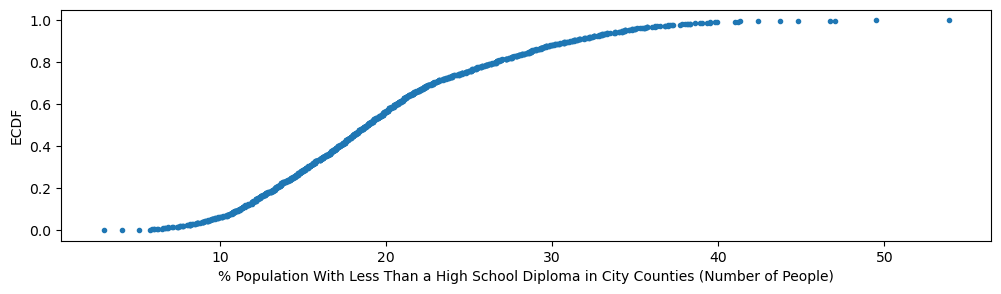

In [25]:
# Plot ECDF values for people with less than a high school diploma living in city areas:

# Set the default style
plt.style.use('default')

# Adjust the figure size to stretch it horizontally to clearly see the outliers
plt.rcParams["figure.figsize"] = (12,3)

# Label the x-axis and y-axis
_ = plt.xlabel('% Population With Less Than a High School Diploma in City Counties (Number of People)')
_ = plt.ylabel('ECDF')

# Set the default style
plt.style.use('default')

# Display the tick labels as whole numbers (the default was scientific notation)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

# Plot the x and y ECDF values 
_ = plt.plot(x_city, y_city, marker = '.', linestyle = 'none')


**Conclusion:** The ECDF plot with percent of the population with less than a high school diploma in the city has outliers on both ends and resembles an s-curve. In the City, 50% of counties have a population where less than 20% of the population has less than a high school diploma. 

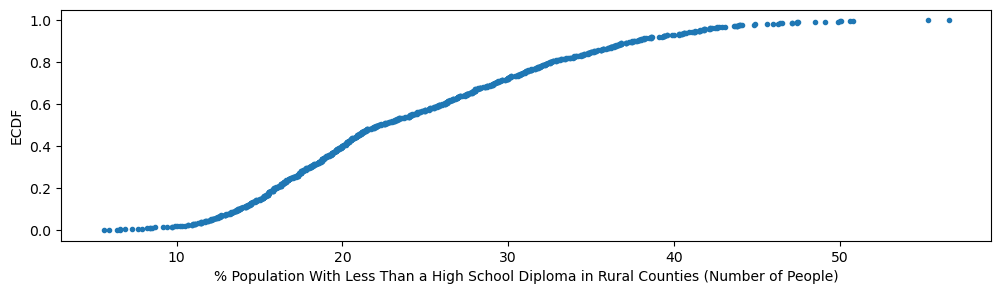

In [26]:
# Plot ECDF values for people with less than a high school diploma living in rural areas:

# Set the default style
plt.style.use('default')

# Adjust the figure size to stretch it horizontally to clearly see the outliers
plt.rcParams["figure.figsize"] = (12,3)

# Label the x-axis and y-axis
_ = plt.xlabel('% Population With Less Than a High School Diploma in Rural Counties (Number of People)')
_ = plt.ylabel('ECDF')

# Display the tick labels as whole numbers (the default was scientific notation)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

# Plot the x and y ECDF values 
_ = plt.plot(x_rural, y_rural, marker = '.', linestyle = 'none')

**Conclusion:** The ECDF plot with percent of the population with less than a high school diploma in the rural areas has outliers on the top end and resembles an s-curve. In rural areas, 50% of counties have a population where less than 25% of the population has less than a high school diploma.

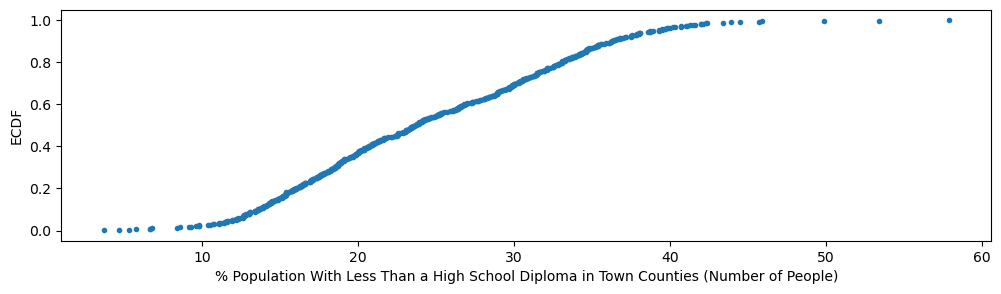

In [27]:
# Plot ECDF values for people with less than a high school diploma living in town areas:

# Set the default style
plt.style.use('default')

# Adjust the figure size to stretch it horizontally to clearly see the outliers
plt.rcParams["figure.figsize"] = (12,3)

# Label the x-axis and y-axis
_ = plt.xlabel('% Population With Less Than a High School Diploma in Town Counties (Number of People)')
_ = plt.ylabel('ECDF')

# Display the tick labels as whole numbers (the default was scientific notation)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

# Plot the x and y ECDF values 
_ = plt.plot(x_town, y_town, marker = '.', linestyle = 'none')

**Conclusion:** The ECDF plot with percent of the population with less than a high school diploma in the town areas has outliers on both ends and resembles an s-curve. In town areas, 50% of counties have a population where less than 25% of the population has less than a high school diploma. This is similar to rural areas.

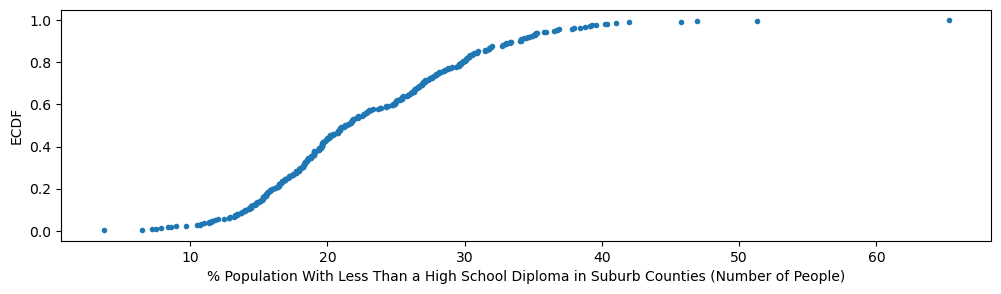

In [28]:
# Plot ECDF values for people with less than a high school diploma living in suberb areas:

# Set the default style
plt.style.use('default')

# Adjust the figure size to stretch it horizontally to clearly see the outliers
plt.rcParams["figure.figsize"] = (12,3)

# Label the x-axis and y-axis
_ = plt.xlabel('% Population With Less Than a High School Diploma in Suburb Counties (Number of People)')
_ = plt.ylabel('ECDF')

# Display the tick labels as whole numbers (the default was scientific notation)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

# Plot the x and y ECDF values 
_ = plt.plot(x_suburb, y_suburb, marker = '.', linestyle = 'none')

**Conclusion:** The ECDF plot with percent of the population with less than a high school diploma in the suburb areas has outliers on both ends (with more at the top) and resembles an s-curve. In suburb areas, 50% of counties have a population where less than 25% of the population has less than a high school diploma. This is similar to rural areas and town areas.

## Data Visualization

In [29]:
# Display labor force information for the U.S. using Choropleth - a graphics library showing information 
# for each U.S. State. 
# Choropleth requires 'data' (which indicates the type of plot - U.S. States is used) and 'layout' (again, U.s. States)
data = dict(type = 'choropleth',
            locations = df_data_by_state['State_x'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = '(Civilian Labor Force for state)',
            z = df_data_by_state['Civilian labor force 2000'],
            colorbar = {'title':'Civilian Labor Force by State (Year 2000)'})

layout = dict(geo = {'scope':'usa'})

In [30]:
# Draw the Choropleth plot
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

**Conclusion:** Looking at the entire U.S., California dominates the civilian labor force with almost 17 million workers. Texas (10.4 million workers) and New York (9.14 million workers) also stand out. Other areas of interest are the Midwest with Illinois (6.49 million workers), Pennsylvania (6.11 million workers) and Ohio (5.78 million workers).

### Question 1: A charity organization wants to explore which communities have residents that need help in completing their high school education. Which communities should they look at to do the most good? (Paul)

In [31]:
# Display unemployment information for the U.S. using Choropleth - a graphics library showing information 
# for each U.S. State. 
# Choropleth requires 'data' (which indicates the type of plot - U.S. States is used) and 'layout' (again, U.s. States)
data = dict(type = 'choropleth',
            locations = df_data_by_state['State_x'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = 'Unemployment rate by sate (2000)',
            z = df_data_by_state['Unemployment Rate 2000'],
            colorbar = {'title':'Unemployment Rate by State for the Year 2000'})

layout = dict(geo = {'scope':'usa'})

In [32]:
# Draw the Choropleth plot
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

**Conclusion:** The western states stand out as having higher unemployment than other geographic regions, notably Oregon with 5.20% unemployment. The center of the country has low comparatively low unemployment (Nebraska has only 2.79% unemployment).  Hawaii has the highest unemployment rate at 6.19%.

In [33]:
# Display education information for the U.S. using Choropleth - a graphics library showing information 
# for each U.S. State. 
# Choropleth requires 'data' (which indicates the type of plot - U.S. States is used) and 'layout' (again, U.s. States)
data = dict(type = 'choropleth',
            locations = df_data_by_state['State_x'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = '% with less than high school diploma (2000)',
            z = df_data_by_state['% < HS Diploma, 2000'],
            colorbar = {'title':'% with less than high school diploma (2000)'})

layout = dict(geo = {'scope':'usa'})

In [34]:
# Draw the Choropleth plot
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

**Conclusion:** The southeast region has the highest concentration of counties with a population with less than a high school diploma. Kentucky, Mississippi, and Louisiana all have a population with 25% or more who do not have a high school diploma. California follows closely at 23%.

In [35]:
# Display education information for the U.S. using Choropleth - a graphics library showing information 
# for each U.S. State. 
# Choropleth requires 'data' (which indicates the type of plot - U.S. States is used) and 'layout' (again, U.s. States)
data = dict(type = 'choropleth',
            locations = df_data_by_state['State_x'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = "% with bachelor's degree or higher (2000)",
            z = df_data_by_state["% >= Bachelors, 2000"],
            colorbar = {'title':"% with bachelor's degree or higher (2000)"})

layout = dict(geo = {'scope':'usa'})

In [36]:
# Draw the Choropleth plot
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

**Conclusion:** The northeast region has a large population with a bachelor’s degree or higher, with Massachusetts leading the way at 33%. Colorado stands out near the center of the country with 32.7% of the population having a bachelor’s degree or higher.

### Question 2: Even in U.S. states with low or moderate unemployment rates, are there counties with unusually high or low unemployment? (Paul)

Text(0.5, 1.0, 'Boxplot Showing County Ranges in Unemployment, 2000')

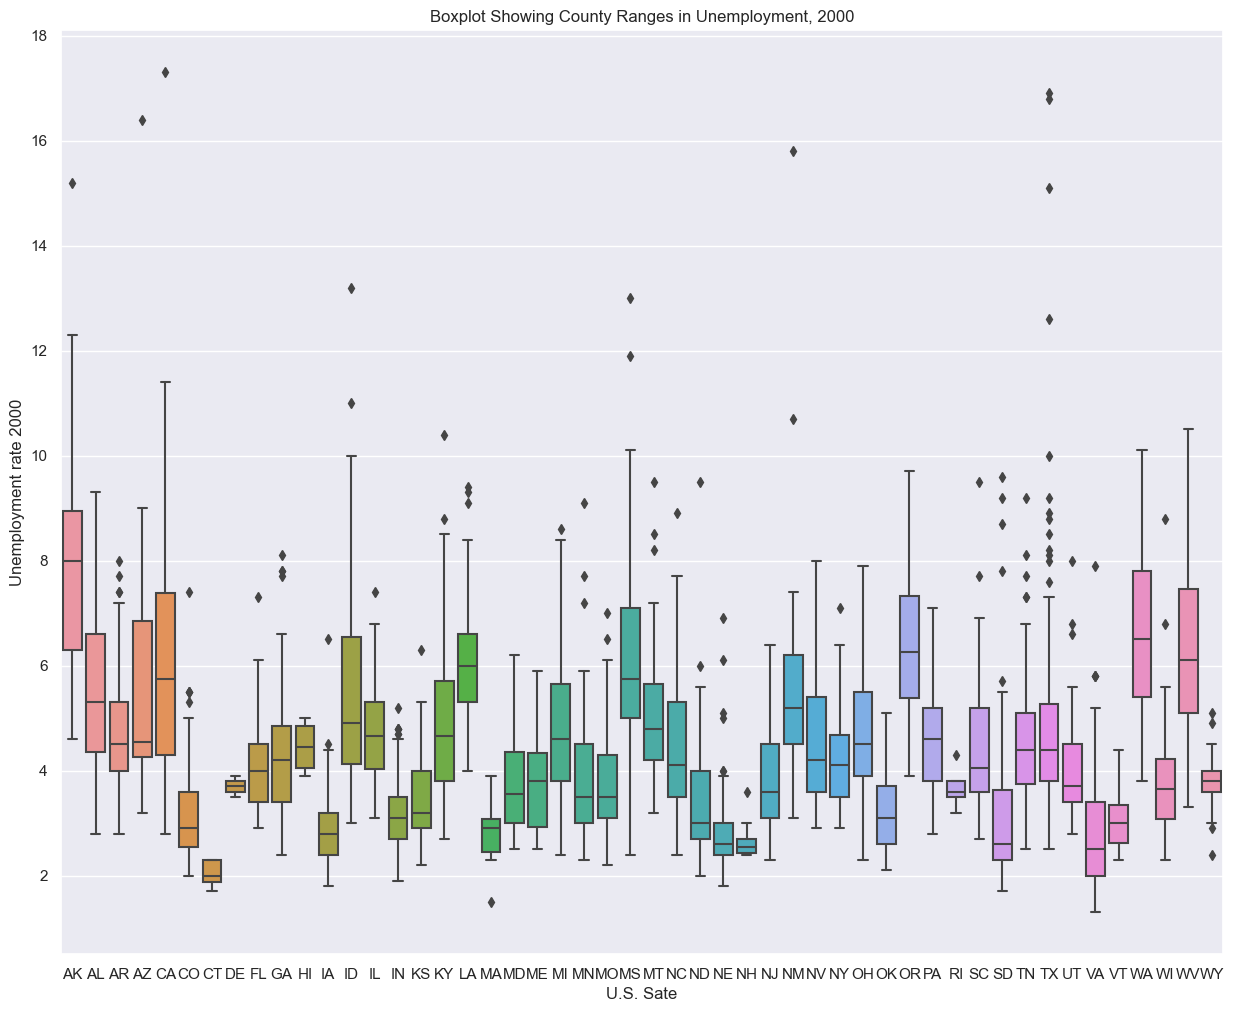

In [37]:
# Create a sorted list of state names
state_names = df_merged['State_x'].unique().tolist()
state_names.sort()

# Set the size of the boxplot to 15 by 12
sns.set(rc={'figure.figsize':(15,12)})

# Create a Seaborn boxplot to show ranges of employment by country within a state
bp1 = sns.boxplot(x='State_x', y='Unemployment rate 2000', data=df_merged, order=state_names)

# Change the X-axis label
bp1.set(xlabel = "U.S. Sate")

# Change the boxplot title
bp1.set_title('Boxplot Showing County Ranges in Unemployment, 2000')


**Conclusion:** The maps showed unemployment levels at the state level, but the data is defined at the county level; this allows for examining information inside each state, and boxplots can be used for this. The western states stood out as having high unemployment, with California at 6.17%. Looking at the county data for California, outlier counties can be seen reaching 17% unemployment, but the upper limit on the boxplot (top of the IQR) is approximately 11 % unemployment. Texas in particular has multiple outlier counties, with peak IQR of about 7% but an outlier reaching 17% unemployment.

Text(0.5, 1.0, 'Boxplot Showing County Ranges of Adults with a High School Diploma Only, 2000')

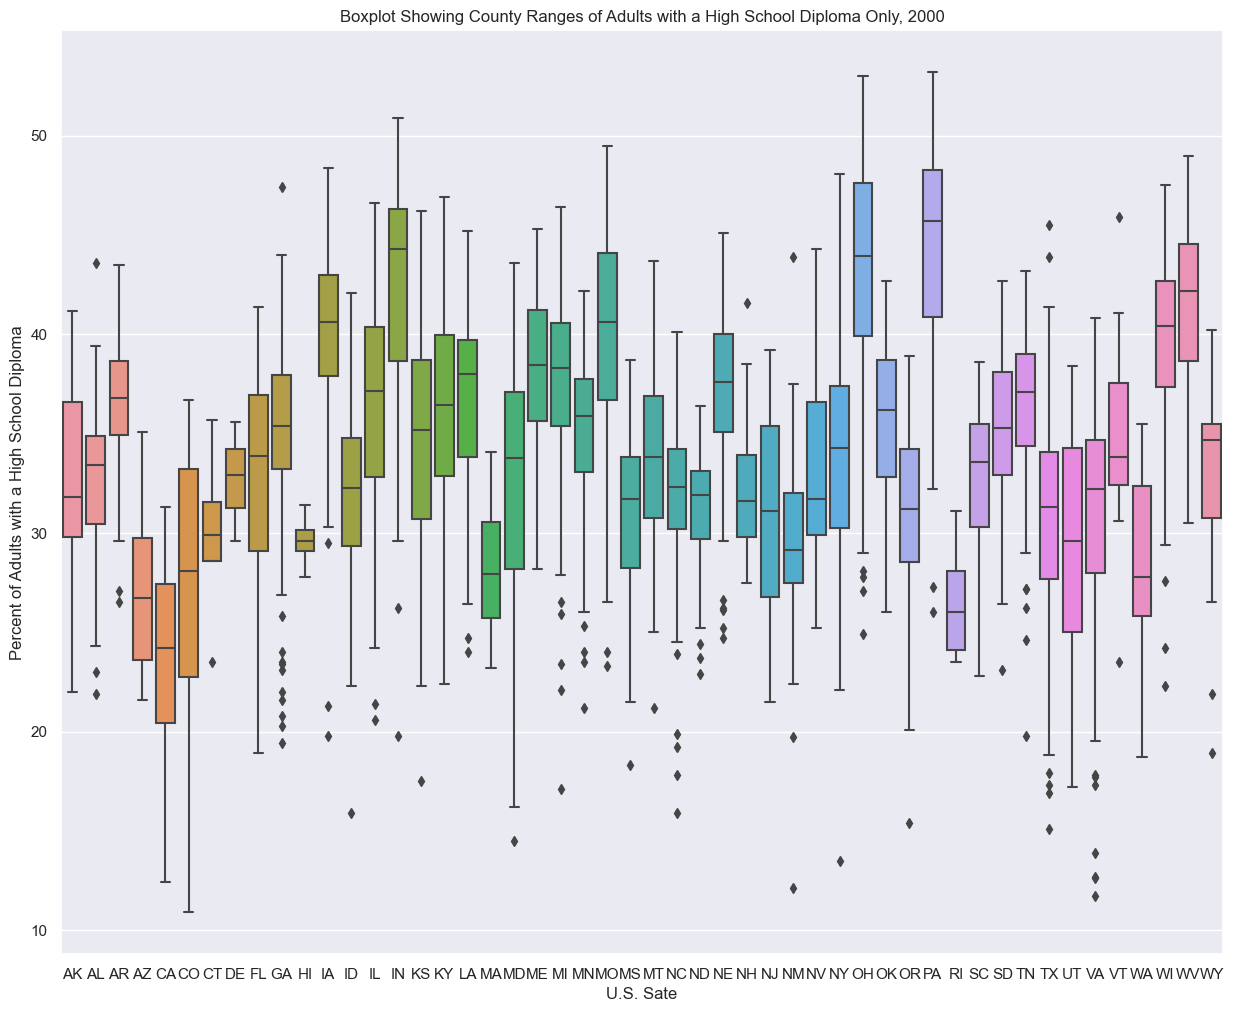

In [38]:
# Create a sorted list of state names
state_names = df_merged['State_x'].unique().tolist()
state_names.sort()

# Set the size of the boxplot to 15 by 12
sns.set(rc={'figure.figsize':(15,12)})

# Create a Seaborn boxplot to show ranges of education by county within a state
#bp1 = sns.boxplot(x='State_x', y='Percent of adults with a high school diploma only, 2000', data=df_merged)
bp1 = sns.boxplot(x='State_x', y='% HS Diploma, 2000', data=df_merged, order=state_names)

# Change the X-axis label
bp1.set(xlabel = "U.S. Sate")

# Change the Y-axis label
bp1.set(ylabel = "Percent of Adults with a High School Diploma")

# Change the boxplot title
bp1.set_title('Boxplot Showing County Ranges of Adults with a High School Diploma Only, 2000')


**Conclusion:** Looking at the percent of adults with a high school diploma only, Georgia has a large number of outliers below the lower limit. This is true for other southern states like North Carolina, but also Midwest states like Michigan and Minnesota.

Text(0.5, 1.0, "Boxplot Showing County Ranges of Adults with a Bachelor's Degree or Higher, 2000")

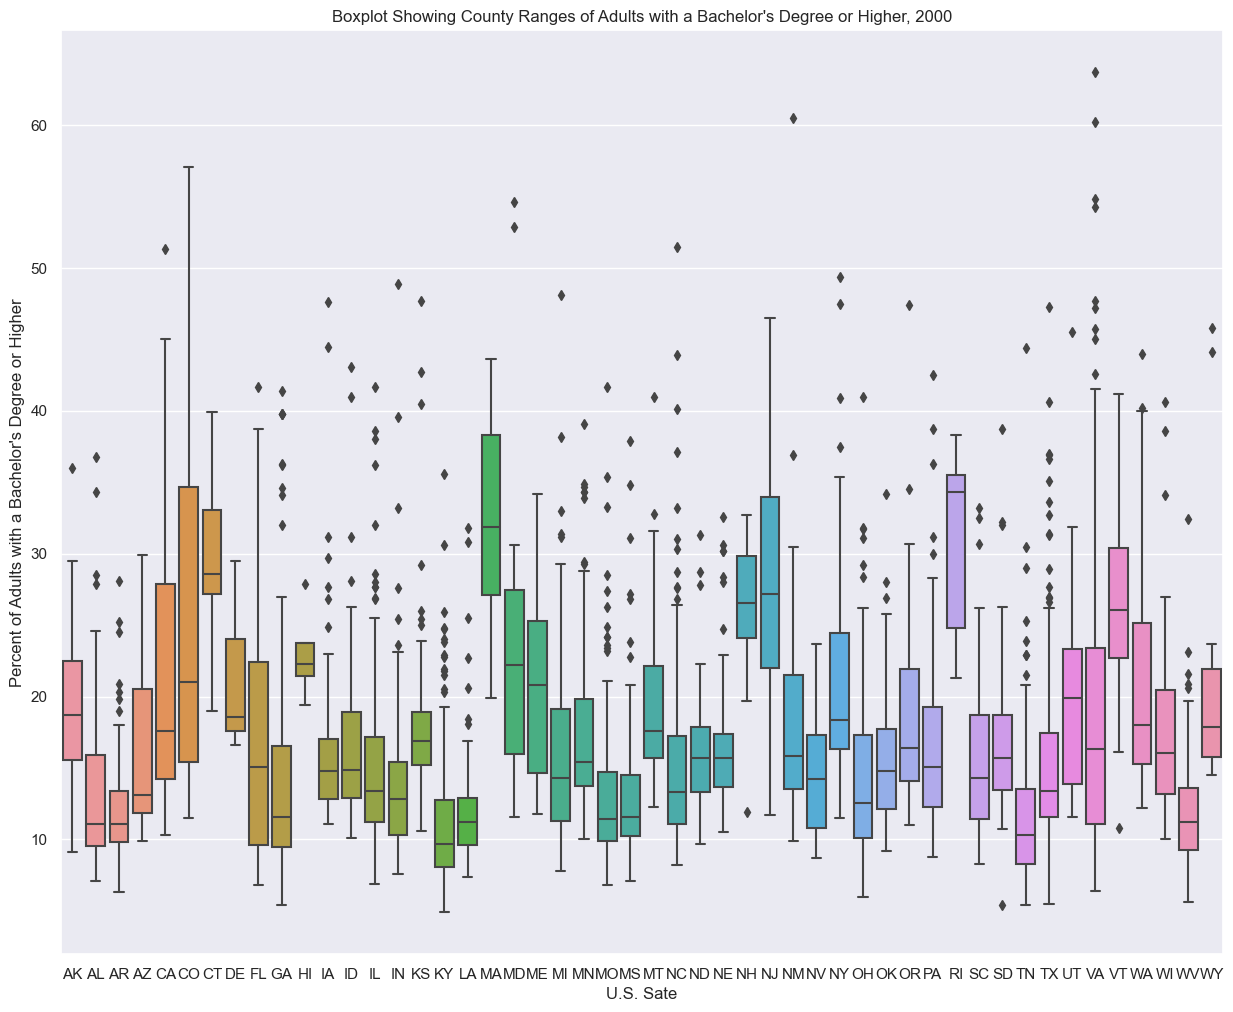

In [39]:
# Create a sorted list of state names
state_names = df_merged['State_x'].unique().tolist()
state_names.sort()

# Set the size of the boxplot to 15 by 12
sns.set(rc={'figure.figsize':(15,12)})

# Create a Seaborn boxplot to show ranges of education by county within a state
bp1 = sns.boxplot(x='State_x', y="% >= Bachelors, 2000", data=df_merged, order=state_names)

# Change the X-axis label
bp1.set(xlabel = "U.S. Sate")

# Change the Y-axis label
bp1.set(ylabel = "Percent of Adults with a Bachelor's Degree or Higher")

# Change the boxplot title
bp1.set_title("Boxplot Showing County Ranges of Adults with a Bachelor's Degree or Higher, 2000")

**Conclusion:** For the percent of adults with a bachelor’s degree or higher, the outliers in nearly every state stand out. In each state, there are counties with the percent of the population with a college degree is much higher than the rest of the state. This is particularly true in southern states like Kentucky, Missouri, Mississippi, and North Carolina.

 ## Quantative Data Exploratory Descriptive Statistics: Correlation coefficients 

In [40]:
# Examine if a correlation exists between unemployment and having less than a high school diploma

# Use the df_data_by_state DataFrame to to examine the correlation between Unemployment Rate 2000 and 
# the Percent of adults with less than a high school diploma 2000
df_data_by_state[['State_x', 'Unemployment Rate 2000','% HS Diploma, 2000']].head()
                 

,State_x,Unemployment Rate 2000,"% HS Diploma, 2000"
0,AK,6.192708,27.375365
1,AL,4.631517,30.380827
2,AR,4.179000,34.104436
3,AZ,3.967340,24.277414
4,CA,4.905245,20.134617


### Question 3: Does low unemployment correlate better with having a bachelor's degree (or higher) or just a high school diploma? (Paul)

Text(0.5, 1.0, 'Linear Regression Plot Showing % With a High School Diploma, 2000 vs % Unemployment 2000 ')

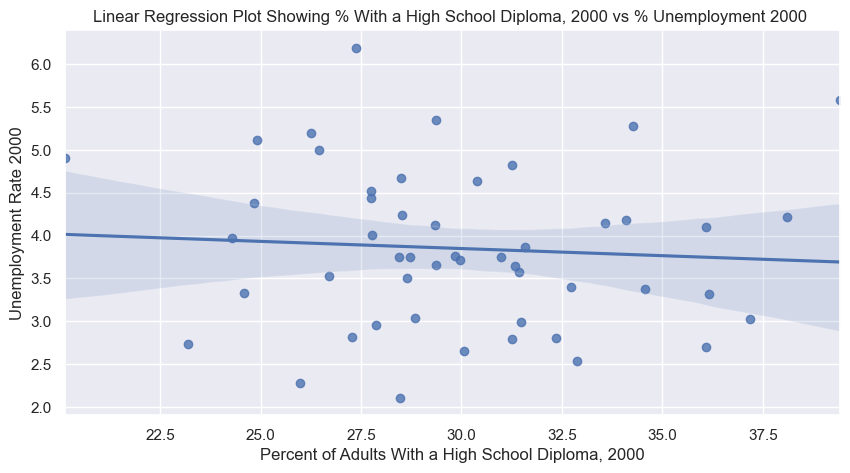

In [41]:
# Set the size of the boxplot to 15 by 12
sns.set(rc={'figure.figsize':(10,5)})

# Create a linear regression plot to visualize unemployment and people with less than a high school diploma
corr_p1 = sns.regplot(x="% HS Diploma, 2000", y="Unemployment Rate 2000", data=df_data_by_state)

# Set the X-axis label
corr_p1.set(xlabel='Percent of Adults With a High School Diploma, 2000')

# Change the boxplot title
corr_p1.set_title("Linear Regression Plot Showing % With a High School Diploma, 2000 vs % Unemployment 2000 ")

**Conclusion:** The linear regression plot of Unemployment and percent of people with less a high school diploma has a negative slope. This indicates that the unemployment and percent of people with only a high school diploma are negatively correlated. The correlation coefficient must be calculated to find the strength of the correlation.

In [42]:
# Calcualte the Pearson standard correlation coefficient (r)
r = df_data_by_state["% HS Diploma, 2000"].corr(df_data_by_state["Unemployment Rate 2000"],method='pearson')


In [43]:
print("The correlation coefficient comparing High School Diploma 2000 (%) with Unemployment 2000 (%): ", r)


The correlation coefficient comparing High School Diploma 2000 (%) with Unemployment 2000 (%):  -0.07256875257203949


**Conclusion:** As shown in the previous plot, there is a slightly negative correlation between unemployment and percent of people with only than a high school diploma. The correlation coefficient was calculated to be approximately -0.0726. This is lower than -0.7, so there is a negative but weak correlation between unemployment rate and percent of people with only a high school diploma.

In [44]:
# Examine if a correlation exists between unemployment and having a bachelor's degree

# Use the df_data_by_state DataFrame to to examine the correlation between Unemployment Rate 2000 and 
# the Percent of adults with a bachelor's degree or higher 2000
df_data_by_state[['State_x', 'Unemployment Rate 2000',"% >= Bachelors, 2000"]].head()

,State_x,Unemployment Rate 2000,"% >= Bachelors, 2000"
0,AK,6.192708,25.270935
1,AL,4.631517,19.034703
2,AR,4.179000,16.660582
3,AZ,3.967340,23.596865
4,CA,4.905245,26.620933


Text(0.5, 1.0, "Linear Regression Plot Showing % of adults with a bachelor's degree or higher, 2000 vs % Unemployment 2000 ")

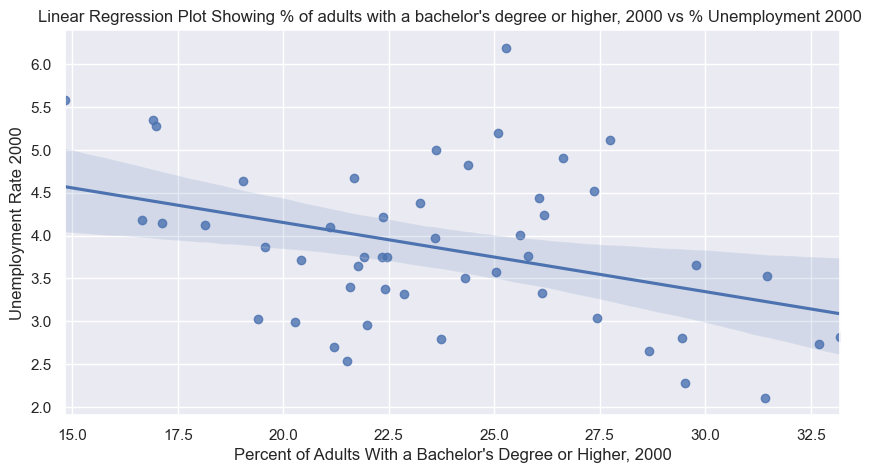

In [45]:
# Set the size of the boxplot to 15 by 12
sns.set(rc={'figure.figsize':(10,5)})

# Create a linear regression plot to visualize Unemployment Rate 2000 and Percent of adults with a bachelor's degree or higher 2000
corr_p1 = sns.regplot(x="% >= Bachelors, 2000", y="Unemployment Rate 2000", data=df_data_by_state)

# Set the X-axis label
corr_p1.set(xlabel="Percent of Adults With a Bachelor's Degree or Higher, 2000")

# Change the boxplot title
corr_p1.set_title("Linear Regression Plot Showing % of adults with a bachelor's degree or higher, 2000 vs % Unemployment 2000 ")


**Conclusion:** The linear regression plot of Unemployment and percent of people with a bachelor’s degree or higher has a negative slope. This indicates that the unemployment rate and percent of people with a bachelor’s degree  are negatively correlated. The correlation coefficient must be calculated to find the strength of the correlation.


In [46]:
# Calcualte the Pearson standard correlation coefficient (r)
r = df_data_by_state["% >= Bachelors, 2000"].corr(df_data_by_state["Unemployment Rate 2000"],method='pearson')


In [47]:
print("The correlation coefficient comparing % Bachelor's Degree or Higher with Unemployment 2000 (%): ", r)

The correlation coefficient comparing % Bachelor's Degree or Higher with Unemployment 2000 (%):  -0.3809390258255998


**Conclusion:** As shown in the previous plot, there is a negative correlation between unemployment and percent of people with a bachelor’s degree or better. The correlation coefficient was calculated to be approximately -0.38. This is closer to 0 than -0.7, so there is a negative but weak correlation between unemployment rate and percent of people with a bachelor’s degree or higher.

## Hypothesis Testing

### Normal Test

[Text(0.5, 0, 'Unemployment Rate, 2000')]

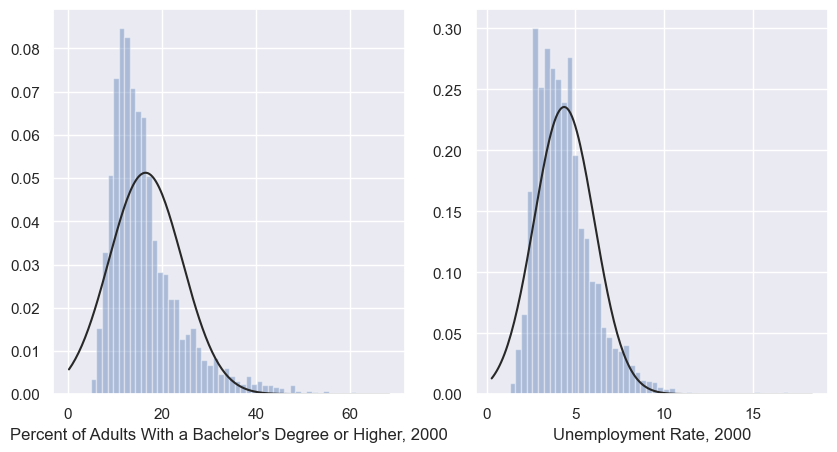

In [48]:
# Prepare two subplots to show the disbtribution of data for "Percent of adults with a bachelor's degree or higher, 2000"
# and "Unemployment rate 2000"
fig, ax = plt.subplots(1,2)

# Create a distplot for "Percent of adults with a bachelor's degree or higher, 2000"
sns.distplot(df_merged["% >= Bachelors, 2000"],fit=stats.norm,kde=False, ax=ax[0])
# Set the X-axis label
ax[0].set(xlabel="Percent of Adults With a Bachelor's Degree or Higher, 2000")

# Create a distplot for "Unemployment rate 2000"
sns.distplot(df_merged["Unemployment rate 2000"],fit=stats.norm,kde=False, ax=ax[1])
ax[1].set(xlabel="Unemployment Rate, 2000")


**Conclusion:** The data "Percent of adults with a bachelor's degree or higher, 2000" and "Unemployment rate 2000" visually appear to be close to normally distributed, but the normal test should be run to verify.

In [49]:
# Use stats.normaltest() to see if the data for "Percent of adults with a bachelor's degree or higher, 2000" if normally 
# distibuted.
stats.normaltest(df_merged["% >= Bachelors, 2000"])

NormaltestResult(statistic=1103.6947814470946, pvalue=2.1663237251888e-240)

In [50]:
# Use stats.normaltest() to see if the data for "Unemployment rate 2000" if normally distibuted.
stats.normaltest(df_merged["Unemployment rate 2000"])

NormaltestResult(statistic=1204.350632751332, pvalue=3.010114111302691e-262)

**Conclusion:** The ‘statistic’ returns s^2 + k^2; s is the z-score from the skew test, while k is the z-score from the kurtosis test. The p-value is the two-sided chi-squared probability of the hypothesis test. The null hypothesis (***H<sub>0</sub>***) is “The data comes from a normal distribution” while the alternate hypothesis (***H<sub>a</sub>***) is “The data does not come from a normal distribution.”


 ***H<sub>0</sub>***: “The data comes from a normal distribution”<br>
 ***H<sub>a</sub>***: “The  data  does  not  come  from  a  normal  distribution."<br>


Since p < 0.05 for both columns of data, we reject the null hypothesis (***H<sub>0</sub>***) that the data comes from a normal distribution. However, because there are so many data points (about 3,000 rows of data), the Central Limit Theorem can be applied and the data can be treated as a normal distribution.


### Z-test

In [51]:
# Utilize the Z-test to test the mean of the distribution for "Percent of adults with a bachelor's degree or higher, 2000"
# The Z-test can be used because the popultion standard deviation is known and there are more than 30 data points.

# H0: The average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA
#     is 17%

# H1: The average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA
#     is less than 17%

test_stat, pval = ztest(df_merged["% >= Bachelors, 2000"], value=17, alternative='smaller', ddof=1.0)
print(f"Test statistic: {test_stat}, P-value: {pval}")


Test statistic: -3.4290387934866184, P-value: 0.0003028614711704304


**Conclusion:** The Z-test is a statistical test on data that can be treated as normally distributed. It produces a test statistic on how the mean of the data test against a null hypothesis. The Z-test was selected over the Student’s T-test because the critical values used for the T-Test are defined by the sample size and is less convenient.

The null hypothesis under test (***H<sub>0</sub>***) states “The average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA is 17%”, while the alternate hypothesis (***H<sub>a</sub>***) states “The average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA is less than 17%.”

***H<sub>0</sub>***: “The average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA is 17%”.

***H<sub>a</sub>***: “The average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA is less than 17%.”

Because the P-value of the Z-test is less than 0.05 (0.0003028614711704304), there is evidence to reject the null hypothesis. This means that there is not enough evidence to support the claim that the average percentage of adults with a bachelor's degree or higher in the year 2000 for all counties in the USA is 17%.



### Correlation Test

In [52]:
# the pandas.DataFrame.corr() method returns the correlation between the columns of interest.
# Examine the correlation between "Unemployment rate 2000" and "Percent of adults with less than a high school diploma, 2000"

df_merged["Unemployment rate 2000"].corr(df_merged["% < HS Diploma, 2000"], method='pearson')


0.48525791224159837

In [53]:
# The SciPy pearsonr() method returns a tuple with two values: the correlation coefficient and a P-value that represents
# the probability of two unrelated processes producing that correlation coeffiecient. 

# The Correlation Test examines two series in the DataFrame to see how they are correlated. The P-value returned 
# by the Correlation Test provides insight into the evidence of there being a correlation between two series:

# P-value < 0.001: The evidence for correlation is strong
# P-value < 0.05: The evidence for correlation is moderate
# P-value < 0.1: The evidece for correlation is weak
# P-value > 0.1: There is no evidence of correlation

# H0: There is no correlation between "Unemployment rate 2000" and "Percent of adults with less than a high school diploma, 2000"

# H1: There is a correlation between "Unemployment rate 2000" and "Percent of adults with less than a high school diploma, 2000"

corr, p = pearsonr(df_merged["Unemployment rate 2000"], df_merged["% < HS Diploma, 2000"])


print(f"Correlation coefficient: {corr}, P-value: {p}")

Correlation coefficient: 0.4852579122415984, P-value: 7.097382052376354e-184


**Conclusion:** The correlation coefficient for the pandas.DataFrame.corr() method and the scipy.stats.pearsonr() method both returned a value of 0.485, which is a moderate positive correlation. The P-value returned from scipy.stats.pearsonr() is a small value close to 0.  When p > 0.05, the data sets being studied are probably independent. 

***H<sub>0</sub>***: There is no correlation between "Unemployment rate 2000" and "Percent of adults with less than a high school diploma, 2000"

***H<sub>a</sub>***: There is a correlation between "Unemployment rate 2000" and "Percent of adults with less than a high school diploma, 2000"

There is enough evidence to reject the null hypothesis (***H<sub>0</sub>***) that there is no correlation between "Unemployment rate 2000" and "Percent of adults with less than a high school diploma, 2000." Both the correlation coefficient and P-value indicate that the data is correlated.

### Chi-squared Test

In [54]:
# The Chi-squared Test compares an expected value with an observed value of categorial data. It produces a statistic that can
# be used to evaulate a null hypothesis (H0).

# H0: "Percent of adults with less than a high school diploma, 2000" and "Unemployment rate 2000" are independent.

# H1: "Percent of adults with less than a high school diploma, 2000" and "Unemployment rate 2000" are dependent.

In [55]:


# Build a table to hold the data. The first element in this example is treated as the expected value, 
# while the second value is the observed value.

table = df_merged["% < HS Diploma, 2000"], df_merged["Unemployment rate 2000"]

# The scipy.stats Chi-square Test returns a tuple with the following values: stat, p, dof, and show the expected value
# stat: The test statistic
# p: The P-value of the test
# dof: The degrees of freedom of the data, which is the number of categories - 1
#      The Chi-squared test is used with categorical data, and in this examole each U.S. county is a category
# expected: The expected frequencies calculated from the margin totals of the table
stat, p, dof, expected = chi2_contingency(table)

# Print out the returned values
print('Test statistic: ', stat)
print('P-value: ', p)
print('Degrees of freedom (dof):', dof)
print('expected values:', expected)

# Set the probability at 95%
prob = 0.95

# Calculate the critical value based on the desired probability and degrees of freedom
# (this is equivalent to using a Chi-squared table lookup to find the critical value)
critical_value = chi2.ppf(prob, dof)

# Print the probability, critical value
print('Probability: ', prob)
print('Critical value: ', critical_value)

# Evaluate the test statistic
print('Evaluate the test statistic:')
if abs(stat) >= critical_value:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')

# Evaluate the P-value
print('Evaluate the P-value:')
alpha = 1.0 - prob
print('Significance: ', alpha)
if p <= alpha:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')

Test statistic:  1713.9652606813252
P-value:  1.0
Degrees of freedom (dof): 3116
expected values: [[35.37540301 27.74705781 31.93845627 ... 16.346454   18.19066932
  13.66395898]
 [ 6.82459699  5.35294219  6.16154373 ...  3.153546    3.50933068
   2.63604102]]
Probability:  0.95
Critical value:  3246.976756354243
Evaluate the test statistic:
Independent (fail to reject H0)
Evaluate the P-value:
Significance:  0.050000000000000044
Independent (fail to reject H0)


**Conclusion:** The Chi-squared test produced a test statistic and P-value. If the P-value is less than or equal to the the significance level (0.05), then there is evidence to reject the null hypothesis (***H<sub>0</sub>***).

***H<sub>0</sub>***: "Percent of adults with less than a high school diploma, 2000" and "Unemployment rate 2000" are independent."

***H<sub>a</sub>***: "Percent of adults with less than a high school diploma, 2000" and "Unemployment rate 2000" are dependent."

The test statistic (1713.96) was less than the critical value (3246.97) and the P-value is 1, so we fail to reject the null hypothesis (***H<sub>0</sub>***) that "Percent of adults with less than a high school diploma, 2000" and "Unemployment rate 2000" are independent. 


### ANOVA: Analysis of Variance

**Comment:** ANOVA (Analysis of Variance) is a technique used to compare the means of more than two sets of data. The means of the data sets do not have to be equal; ANOVA measures how likely the means represent data from the same overall population. It is still possible to use pair-wise statistical tests on data to compare the sample means, but this causes the errors to compound for each test. Put another way, ANOVA is a variability ratio where the variance between means is divided by the variance within the means. If the variance between means is large comparted to a smaller variance within means, the null hypothesis (***H<sub>0</sub>***) is rejected. If the variance between means is similar to the variance within means, or if the variance between means is small and the variance within means is large, then we fail to reject the null hypothesis (***H<sub>0</sub>***).

In [56]:
# Create a DataFrame to use with the ANOVA test using "Percent of adults with less than a high school diploma, 2000" 
# and area ("City/Suburb/Town/Rural 2013")
df_anova = df_merged[["City/Suburb/Town/Rural 2013","% < HS Diploma, 2000"]]

# Group the annova dataframe by area type (City/Suburb/Town/Rural 2013)
df_anova_groupby_area = df_anova.groupby(['City/Suburb/Town/Rural 2013'])


In [57]:
# Perform the ANOVA calculation using the SciPy f_oneway method to calculate the F statistic using a one-way
# ANOVA test and create the null hypothesis

# H0: There is no difference in the mean percentage of adults with less than a high school diploma when broken
#     down by City, Suburb, Rural, and Town areas.

# Ha: There is a difference in the mean percentage of adults with less than a high school diploma when broken
#     down by City, Suburb, Rural, and Town areas.

anova_result_1 = stats.f_oneway(df_anova_groupby_area.get_group("City")["% < HS Diploma, 2000"], 
                                df_anova_groupby_area.get_group("Suburb")["% < HS Diploma, 2000"],
                                df_anova_groupby_area.get_group("Rural")["% < HS Diploma, 2000"],
                                df_anova_groupby_area.get_group("Town")["% < HS Diploma, 2000"])

print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=60.470231199169056, pvalue=5.416271238168328e-38)


**Conclusion:** If the variance between means is large comparted to a smaller variance within means, the null hypothesis (H0) is rejected.

***H<sub>0</sub>***: There is no difference in the mean percentage of adults with less than a high school diploma when broken
     down by City, Suburb, Rural, and Town areas.

***H<sub>a</sub>***: There is a difference in the mean percentage of adults with less than a high school diploma when broken
     down by City, Suburb, Rural, and Town areas.
     
The result of the one-way ANOVA calculation produced a F-statistic significantly larger than 1 and a P-value much less than 0.05; this is statistically significant and is evidence to reject the null hypothesis (***H<sub>0</sub>***) that there is no difference in the mean percentage of adults with less than a high school diploma when broken down by City, Suburb, Rural, and Town areas. 

### Question 4: Which years have the highest and lowest unemployment rate over the course of 21 years? (Fiona)

In [128]:
# Create a function to return the unemployment rate for each year, name it unemplyRate.
def unemplyRate(year):
    unemployment_rate= df_merged['Unemployed {}'.format(year)].sum()/df_merged['Civilian labor force {}'.format(year)].sum()*100
    return unemployment_rate

# Create arrays for year and unemployment rate separately.
array_year=np.arange(2000, 2021)
array_unemplyRate=[unemplyRate(2000),unemplyRate(2001),unemplyRate(2002),unemplyRate(2003),unemplyRate(2004),
                  unemplyRate(2005),unemplyRate(2006),unemplyRate(2007),unemplyRate(2008),unemplyRate(2009),
                  unemplyRate(2010),unemplyRate(2011),unemplyRate(2012),unemplyRate(2013),unemplyRate(2014),
                   unemplyRate(2015),unemplyRate(2016),unemplyRate(2017),unemplyRate(2018),unemplyRate(2019),unemplyRate(2020)]

# Convert a dictionary with column names year and unemployment rate,
# and the two arrays containing their values into a DataFrame.
df_yearly=pd.DataFrame({'Year': array_year, 'Unemployment Rate': array_unemplyRate})

# Display the DataFrame
df_yearly

,Year,Unemployment Rate
0,2000,3.987268
1,2001,4.729557
2,2002,5.786635
3,2003,5.982835
4,2004,5.524438
5,2005,5.096690
6,2006,4.627300
7,2007,4.622688
8,2008,5.790927
9,2009,9.259746


In [59]:
# Display the year which has the maxmium unemployment rate and minimum unemployment rate.
df_yearly_data.loc[df_yearly_data['Unemployment Rate']==df_yearly_data['Unemployment Rate'].max()]

,Year,Unemployment Rate
10,2010,9.643024


In [60]:
df_yearly_data.loc[df_yearly_data['Unemployment Rate']==df_yearly_data['Unemployment Rate'].min()]

,Year,Unemployment Rate
19,2019,3.662809


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020')])

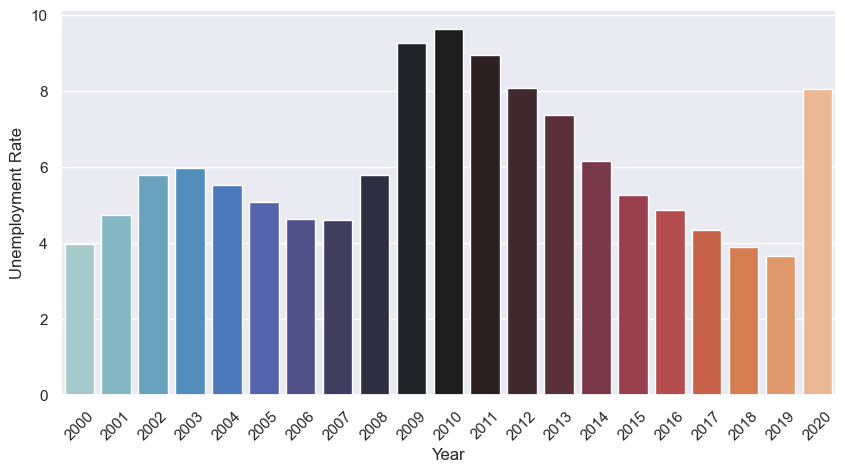

In [123]:
# Use barplot to visualize the unemployment rate for each year.
fig, ax=plt.subplots(figsize=(10, 5))
sns.barplot(x='Year', y='Unemployment Rate', data=df_yearly_data, palette='icefire')
plt.xticks(rotation=45)

**Conclusion:** From year 2000 to 2020, 2010 has the highest unemployment rate 9.64%, while 2019 has the lowest unemployment rate 3.66%. However, there was a great increase on unemployment rate from year 2008 to 2009 and 2019 to 2020.

### Question 5:  Which states contribute the most and the least for the unemployment change from year 2019 to 2020? (Fiona)

In [62]:
# create a dataframe df_sum which aggregates the sum of civilian labor force and unemployed for 2019 and 2020
df_sum=pd.pivot_table(df_merged, index='State_x', values=['Civilian labor force 2019', 'Civilian labor force 2020',
                                                         'Unemployed 2019', 'Unemployed 2020'], aggfunc=sum).reset_index()

In [63]:
# show the head of df_sum
df_sum.head()

,State_x,Civilian labor force 2019,Civilian labor force 2020,Unemployed 2019,Unemployed 2020
0,AK,338294.0,332648.0,18177.0,25995.0
1,AL,2237287.0,2230132.0,67888.0,131065.0
2,AR,1365272.0,1354299.0,48109.0,81952.0
3,AZ,3529442.0,3561240.0,171507.0,281433.0
4,CA,19353742.0,18821176.0,803218.0,1908093.0


In [64]:
# define a function to return the unemployment rate for any year.
def df_rate(year):
    return df_sum['Unemployed {}'.format(year)]/df_sum['Civilian labor force {}'.format(year)]*100   

In [65]:
# add two columns to show the unemployment rate for each state for both year 2019 and 2020.
df_sum['Unemployment rate 2019']=df_rate(2019)
df_sum['Unemployment rate 2020']=df_rate(2020)

In [66]:
# show the head of df_sum with only columns of unemployment rate, assign it to a dataframe df_rate 
df_rate=df_sum[['State_x', 'Unemployment rate 2019', 'Unemployment rate 2020']]
df_rate.head()

,State_x,Unemployment rate 2019,Unemployment rate 2020
0,AK,5.373137,7.814567
1,AL,3.034389,5.877006
2,AR,3.523767,6.051249
3,AZ,4.859323,7.902669
4,CA,4.150195,10.138012


In [67]:
# add another column to show the unemployment rate change
df_rate['% Unemployment rate change']=(df_rate['Unemployment rate 2020']-df_rate['Unemployment rate 2019'])/df_rate['Unemployment rate 2019']*100

In [68]:
# show the head of df_rate
df_rate.head()

,State_x,Unemployment rate 2019,Unemployment rate 2020,% Unemployment rate change
0,AK,5.373137,7.814567,45.437698
1,AL,3.034389,5.877006,93.680032
2,AR,3.523767,6.051249,71.726711
3,AZ,4.859323,7.902669,62.628994
4,CA,4.150195,10.138012,144.277967


In [69]:
# show 5 states that have the highest unemployment rate change 
df_rate.sort_values(by='% Unemployment rate change', ascending=False).head(5)

,State_x,Unemployment rate 2019,Unemployment rate 2020,% Unemployment rate change
10,HI,2.454310,11.631602,373.925476
32,NV,3.904095,12.833004,228.706267
18,MA,3.023465,8.861822,193.101503
30,NJ,3.425938,9.786199,185.650179
5,CO,2.659245,7.271170,173.429859


In [70]:
# show 5 states that have the lowest unemployment rate change
df_rate.sort_values(by='% Unemployment rate change', ascending=True).head(5)

,State_x,Unemployment rate 2019,Unemployment rate 2020,% Unemployment rate change
28,NE,2.989404,4.230367,41.512080
0,AK,5.373137,7.814567,45.437698
24,MS,5.546770,8.084132,45.744861
40,SD,2.992517,4.643643,55.175173
49,WY,3.715453,5.842239,57.241624


**Concluson:**The sorted dataframe shows that all the states have positive unemployment rate changes, from 42% to 374%. The five states that have the highest unemployment rate change from 2019 to 2020 are Hawaii, Nevada, Massachusetts, New Jersey, Colorado, with changes of more than 170%. And the five states that have the lowest unemployment rate change are Nebraska, Alaska, Mississippi, South Dakota, and Wyoming, with changes of less than 60%.

In [71]:
# Since so many states have unemployment rate change that are greater than 100%, 
# let's examine the fraction of states that have unemployment rate equal to or less than 100%.
# We can use the ECDF which Paul already defined to plot the cumulative data.
# First, let's caculate ECDF values for the percent change of unemployment rate
x, y=ecdf(df_rate['% Unemployment rate change'])

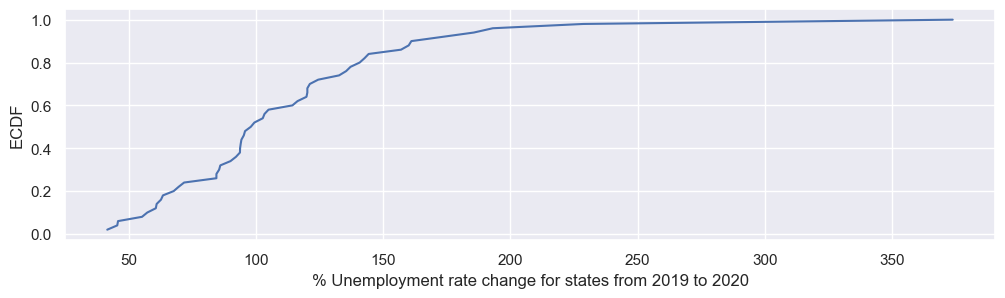

In [72]:
# Plot ECDF values for the unemployment rate change from year 2019 to 2020.
# set figure size of the plot so it's easier to see the line trend 
plt.rcParams['figure.figsize']=(12, 3)
# Label the x-axis and y-axis
plt.xlabel('% Unemployment rate change for states from 2019 to 2020')
plt.ylabel('ECDF')
# Plot the x and y ECDF values
plt.plot(x, y)

**Conclusion:** The ECDF plot shows that approximate 50% of the states have unemployment rate change equal to or less than 100%. This means that another 50% of the states have unemployment rate change larger than 100%.

### Question 6: Is there a significant change regarding percentages of people completing different diplomas between year 2000 and year 2015-2019? (Fiona)

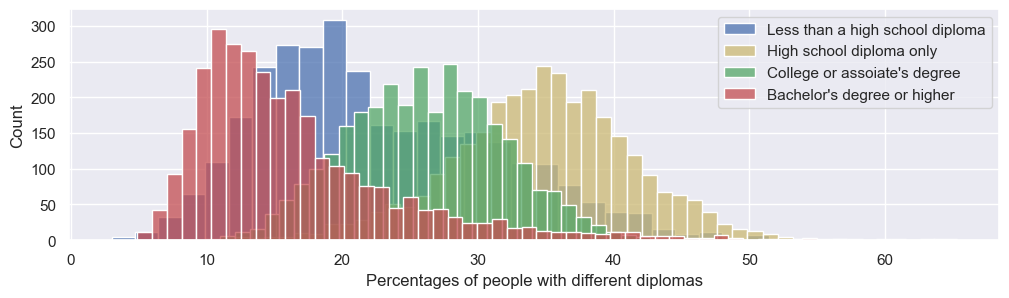

In [73]:
sns.histplot(df_merged["% < HS Diploma, 2000"], color='b')
sns.histplot(df_merged["% HS Diploma, 2000"], color='y')
sns.histplot(df_merged["% Some College, 2000"], color='g')
sns.histplot(df_merged["% >= Bachelors, 2000"], color='r')
plt.xlabel('Percentages of people with different diplomas')
plt.legend(['Less than a high school diploma', 'High school diploma only', 'College or assoiate\'s degree', 
           'Bachelor\'s degree or higher'], loc='upper right')

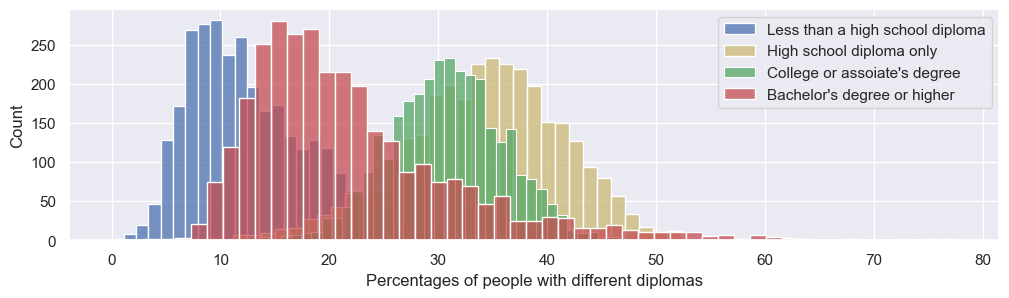

In [74]:
sns.histplot(df_merged["% < HS Diploma, 2015-19"], color='b')
sns.histplot(df_merged["% HS Diploma, 2015-19"], color='y')
sns.histplot(df_merged["% Some College, 2015-19"], color='g')
sns.histplot(df_merged["% >= Bachelors, 2015-19"], color='r')
plt.xlabel('Percentages of people with different diplomas')
plt.legend(['Less than a high school diploma', 'High school diploma only', 'College or assoiate\'s degree', 
           'Bachelor\'s degree or higher'], loc='upper right')

**Conclusion:** There is a significant change in the percentages of people completing different diplomas between year 2000 and year 2015-2019, with more people having bachelor's degree or higher, and fewer people having less than a high school diploma. However, the percentages of people with high school diploma only and college or associate's degree don't have too much difference.  

# Hypothesis Testing

## Normal Test

### Test if the unemployment rate of year 2020 is normally distributed
- H0: Distribution is normal.
- H1: Distribution is not normal.

In [75]:
# In order to check if a data is normally distributed, we use the built-in function normaltest().
# Normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value. 
from scipy.stats import normaltest
normaltest(df_merged['Unemployment rate 2020'])

NormaltestResult(statistic=491.7981758483595, pvalue=1.6120667093233896e-107)

**Conclusion:** Since p-value<0.05, the unemployment rate of 2020 does not follow a normal distribution (Reject H0).

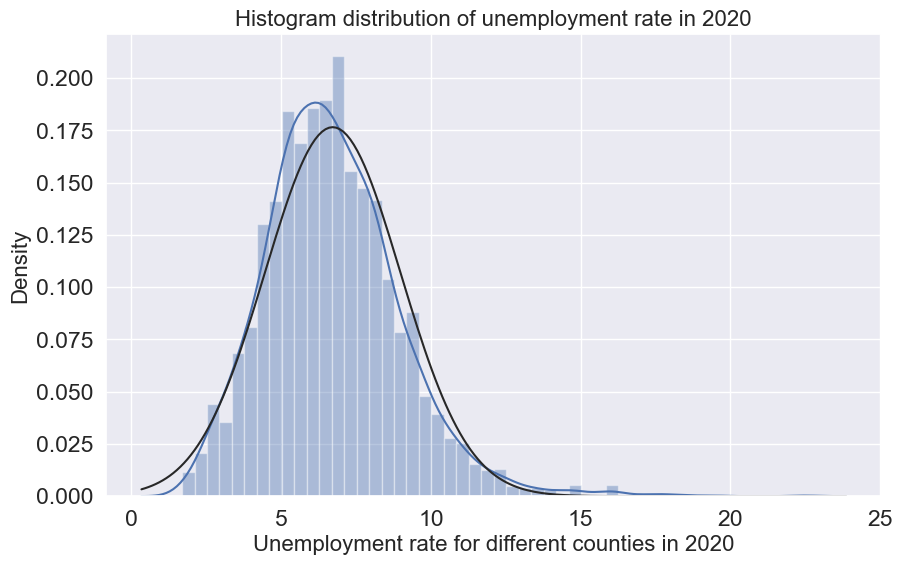

In [76]:
# We can also visualize the data through distplot to check our result.

# Set the figure width of 10 and height of 6
plt.rcParams["figure.figsize"] = [10,6]
sns.set_style("darkgrid")
#set context , font scale and font size
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
# the fit will impose a normal curve to the histogram
# we set kde to false because by default it uses the kde
sns.distplot(df_merged['Unemployment rate 2020'],fit=stats.norm,kde=True)
# add title, xlabel to the plot
plt.title('Histogram distribution of unemployment rate in 2020')
plt.xlabel('Unemployment rate for different counties in 2020')
plt.show()

**Conclusion:** The kde is skewed left, so we reject the null hypothesis that the unemployment rate for 2020 follows a normal distribution.

## Z-test

### Test if the mean of the percent of adults with high school diploma only in 2015-19 is 35 against the alternative that it is not<br>$\begin{align}
  & {{H}_{0}}:\,\mu =\,{{\mu }_{0}} \\ 
 & {{H}_{1}}:\,\mu \ne {{\mu }_{0}} \\ 
\end{align}$<br>

In [77]:
df_merged['% HS Diploma, 2015-19'].mean()

34.17847289059988

In [78]:
(test_statistic, p_value) = ztest(df_merged['% HS Diploma, 2015-19'], value=35, alternative='two-sided', ddof=1.0)

In [79]:
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

The test statistic is:  -6.345513987373989
The p-value is:  2.216840537231483e-10


**Conclusion:** p-value is less than 0.05, so at alpha =0.05 level of significance we can reject the null hypothesis. This means that there is not enough evidence to support the claim that the average percentage of adults with high school diploma only in the year 2015-19 for all counties in the USA is 35%.

### Testing the hypothesis that the mean is 35 against the alternative that it is  GREATER

$\begin{align}
  & {{H}_{0}}:\mu <={{\mu }_{0}} \\ 
 & {{H}_{1}}:\mu >{{\mu }_{0}} \\ 
\end{align}$   

In [80]:
(test_statistic, p_value) = ztest(df_merged['% HS Diploma, 2015-19'], value=35, alternative='larger', ddof=1.0)

In [81]:
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

The test statistic is:  -6.345513987373989
The p-value is:  0.999999999889158


**Conclusion:** p-value is very close to 1, so at alpha =0.05 level of significance we can not reject the null hypothesis. This means that there's stong evidence to support that the average percentage of adults with high school diploma only in the year 2015-19 for all counties in the USA is less than 35%.

### Testing the hypothesis that the mean is 35 against the alternative that it is  SMALLER

$\begin{align}
  & {{H}_{0}}:\mu >={{\mu }_{0}} \\ 
 & {{H}_{1}}:\mu < {{\mu }_{0}} \\ 
\end{align}$   

In [82]:
(test_statistic, p_value) = ztest(df_merged['% HS Diploma, 2015-19'], value=35, alternative='smaller', ddof=1.0)

In [83]:
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

The test statistic is:  -6.345513987373989
The p-value is:  1.1084202686157414e-10


**Conclusion:**p-value is less than 0.05, so at alpha =0.05 level of significance we can reject the null hypothesis. This means that there is not enough evidence to support the claim that the average percentage of adults with high school diploma only in the year 2015-19 for all counties in the USA is larger than 35%.
From all the hypothesis testings we can conclude that the z-test indicates that the average percentage of adults with high school diploma only in the year 2015-19 is less than 35%.

## Correlation test

### Testing the correlation between the percent of adults with less than a high school diploma  and the unemployment rate in year 2015-2019.
- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [84]:
# Calculate the average unemployment rate for all counties from 2015-2019.
df_merged['Unemployed 2015-2019']=df_merged['Unemployed 2015']+df_merged['Unemployed 2016']+df_merged['Unemployed 2017']
+df_merged['Unemployed 2018']+df_merged['Unemployed 2019']
df_merged['Civilian labor force 2015-2019']=df_merged['Civilian labor force 2015']+df_merged['Civilian labor force 2016']
+df_merged['Civilian labor force 2017']+df_merged['Civilian labor force 2018']+df_merged['Civilian labor force 2019']
df_merged['Unemployment rate 2015-19']= df_merged['Unemployed 2015-2019']/df_merged['Civilian labor force 2015-2019']*100
# Show the column Unemploument rate 2015-2019
df_merged['Unemployment rate 2015-19']

0       8.817506
1       7.523158
2       7.707645
3       7.974111
4       7.294081
          ...   
3112    6.110381
3113    9.241071
3114    8.381459
3115    6.821677
3116    4.519774
Name: Unemployment rate 2015-19, Length: 3117, dtype: float64

In [85]:
stat, p = pearsonr(df_merged['Unemployment rate 2015-19'], df_merged["% < HS Diploma, 2015-19"])

In [86]:
print(stat, p)
if p > 0.05:
  print('Probably independent')
else:
 print('Probably dependent')

0.45652019698009155 2.5633905632932428e-160
Probably dependent


<AxesSubplot:xlabel='% < HS Diploma, 2015-19', ylabel='Unemployment rate 2015-19'>

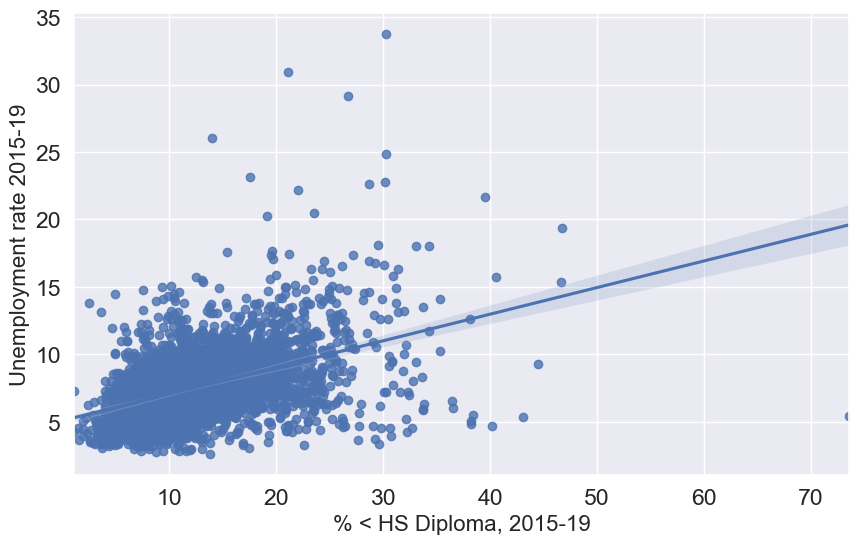

In [87]:
# Let's visualize the data to check if it shows the same result
sns.regplot(x="% < HS Diploma, 2015-19", y='Unemployment rate 2015-19',
            data=df_merged)

**Conclusion:** P-value<0.05, so the unemployment rate and percent of adults with less than a high school diploma in year 2015-2019 are probably dependent. Since the pearson correlation coeffient is 0.46, we can say that they are positively correlated, and the correlation between them are moderate strong. 

## Chi-squared Test

### Testing if the unemployment rate matches the percent of adults with a bachelor's degree or higher in year 2015-2019
- H0: the unemployment rate and the percent of adults with a bachelor's degree or higher are independent.
- H1: there is a dependency between the samples.

In [88]:
# contingency table
table= df_merged['Unemployment rate 2015-19'], df_merged["% >= Bachelors, 2015-19"]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance={}, p={}'.format(alpha, p))
if p <= alpha:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')

(0       8.817506
1       7.523158
2       7.707645
3       7.974111
4       7.294081
          ...   
3112    6.110381
3113    9.241071
3114    8.381459
3115    6.821677
3116    4.519774
Name: Unemployment rate 2015-19, Length: 3117, dtype: float64, 0       10.4
1       13.1
2       12.7
3       33.4
4       16.1
        ... 
3112    16.5
3113    24.2
3114    29.1
3115    19.0
3116    18.0
Name: % >= Bachelors, 2015-19, Length: 3117, dtype: float64)
dof=3116
[[ 4.97176678  5.33542326  5.27966784 ...  9.69683952  6.68033385
   5.82609744]
 [14.24573951 15.28773438 15.12797685 ... 27.78461983 19.14134353
  16.69367657]]
probability=0.950, critical=3246.977, stat=6891.142
Dependent (reject H0)
significance=0.050000000000000044, p=1.5561516234184176e-285
Dependent (reject H0)


**Conclusion:** P-value<0.05, reject the null hypothesis, so the unemployment rate and percent of adults with a bachelor's degree or higher in year 2015-19 are dependent. 

### ANOVA: Analysis of Variance

### Testing whether median household income differs based on areas(city/suburb/town/rural)
- H0: the median household income in different areas has no significant difference
- H1: at least one area has the median houshold income that differs significantly from others

In [89]:
#extract only the columns of interest weight and group
df_anova = df_merged[['City/Suburb/Town/Rural 2013','Median Household Income 2019']]

#display the dataframe head
df_anova.head()

,City/Suburb/Town/Rural 2013,Median Household Income 2019
0,City,47918.0
1,City,52902.0
2,City,49692.0
3,City,54127.0
4,City,65403.0


In [90]:
#find the unique group values assign it to grps
grps = pd.unique(df_anova['City/Suburb/Town/Rural 2013'].values)
grps

array(['City', 'Suburb', 'Rural', 'Town'], dtype=object)

In [91]:
# group Median Houshold Income by areas
dict_anova={grp: df_anova['Median Household Income 2019'][df_anova['City/Suburb/Town/Rural 2013']==grp] for grp in grps}
dict_anova

{'City': 0       47918.0
 1       52902.0
 2       49692.0
 3       54127.0
 4       65403.0
          ...   
 1148    61624.0
 1149    62108.0
 1150    59643.0
 1151    69613.0
 1152    66104.0
 Name: Median Household Income 2019, Length: 1153, dtype: float64,
 'Suburb': 1153    42024.0
 1154    50897.0
 1155    47719.0
 1156    45980.0
 1157    39990.0
          ...   
 1667    58248.0
 1668    63752.0
 1669    58982.0
 1670    57325.0
 1671    52216.0
 Name: Median Household Income 2019, Length: 371, dtype: float64,
 'Rural': 1283    51276.0
 1284    29572.0
 1285    42922.0
 1286    40827.0
 1287    45273.0
          ...   
 3112    48761.0
 3113    53908.0
 3114    55576.0
 3115    53018.0
 3116    48513.0
 Name: Median Household Income 2019, Length: 980, dtype: float64,
 'Town': 1672    35972.0
 1673    31906.0
 1674    39944.0
 1675    45982.0
 1676    44836.0
          ...   
 2441    57953.0
 2442    64030.0
 2443    80639.0
 2444    98837.0
 2445    70756.0
 Name: Median Hous

In [92]:
#find the statistic F and P value calling the stats.f_oneway method from scipy
F, p = stats.f_oneway(dict_anova['City'], dict_anova['Suburb'], dict_anova['Town'], dict_anova['Rural'])

In [93]:
#print the p-value
print("p-value for significance is: ", p)

p-value for significance is:  3.944965924079782e-150


**Conclusion:** p-value<0.05, reject the null hypothesis. At least one area does not have the same mean.

#### Separately: city, suburb and town

In [94]:
f_val, p_val = stats.f_oneway(dict_anova['City'], dict_anova['Suburb'], dict_anova['Town']) 
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 208.85695705451874 , P = 1.4478259314252543e-83


#### Separately: city, suburb and rural

In [95]:
f_val, p_val = stats.f_oneway(dict_anova['City'], dict_anova['Suburb'], dict_anova['Rural']) 
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 310.3855867034588 , P = 3.914159101923696e-121


#### Separately: city, town, and rural

In [96]:
f_val, p_val = stats.f_oneway(dict_anova['City'], dict_anova['Town'], dict_anova['Rural']) 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 362.58297379265696 , P = 1.904249005060578e-140


#### Separately: suburb, town and rural

In [97]:
f_val, p_val = stats.f_oneway(dict_anova['Suburb'], dict_anova['Town'], dict_anova['Rural']) 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 11.51236925810701 , P = 1.0699554695614907e-05


**Conclusion:** Based on the separate tests, p_values among any three of the areas are less than 0.05, meaning at least one area among any three of the areas has different median houshold income mean.

In [98]:
# Since the p-value is much less in the last separate test, 
# let's examine the last group and see if there's significant difference between any two of them.

#### Separate test: suburb and town

In [99]:
f_val, p_val = stats.f_oneway(dict_anova['Suburb'], dict_anova['Town']) 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 9.22708142147127 , P = 0.0024476361838968327


#### Separate test: suburb and rural

In [100]:
f_val, p_val = stats.f_oneway(dict_anova['Suburb'], dict_anova['Rural']) 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 23.73476570516828 , P = 1.2364270478373443e-06


#### Separate test: town and rural

In [101]:
f_val, p_val = stats.f_oneway(dict_anova['Town'], dict_anova['Rural']) 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 2.8774182752758586 , P = 0.09002556319094654


**Conclusion:** When you examine any two areas among suburb, town and rural, the p-values are not that small, especially the one for town and rural. Since 0.05<p<0.1 in the last group, there is weak evidence against the null hypothesis. 

### Question 7: What is the correlation between the adults with less than a high school diploma and unemployment rate in the year 2000? (Ping)

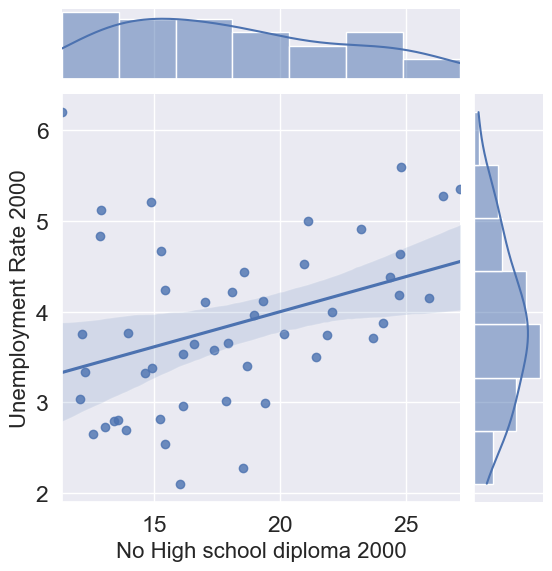

In [102]:
# PING JU
# Use Jointplot to show correlation between Unemployment Rate 2000 and Percent of adults with less than a high school diploma 2000

df1 = df_data_by_state[['State_x', '% < HS Diploma, 2000','Unemployment Rate 2000']].sort_values(by=['Unemployment Rate 2000'],ascending=False)

# Rename for X Axis
df1 = df1.rename(columns = {"% < HS Diploma, 2000":"No High school diploma 2000"})

#Print Jointplot
sns.jointplot(x='No High school diploma 2000',y='Unemployment Rate 2000',data=df1, kind = 'reg')



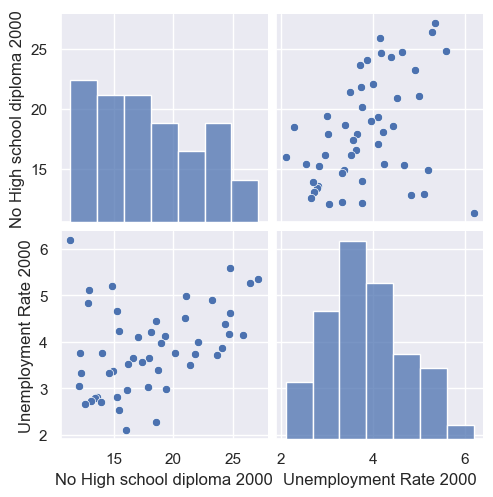

In [103]:
#Define function
def draw_pairplot(df):
    sns.pairplot(df)

# Set the font size
sns.set(font_scale = 1)

#Draw Plot
draw_pairplot(df1)

Conclusion: According to the jointplot and pairplot, we acknowledge the positive correlation between the percentage of adults with less than a high school diploma and unemployment rate in the year 2000. It displays a positive slope. This shows as one variable increases the other one increases also. We see that as the percent of adults with less than a high school diploma increases, the unemployment rate increases. 

### Question 8: What will happen if the adults complete some college or complete a bachelor's degree or higher in the year 2000? (Ping)

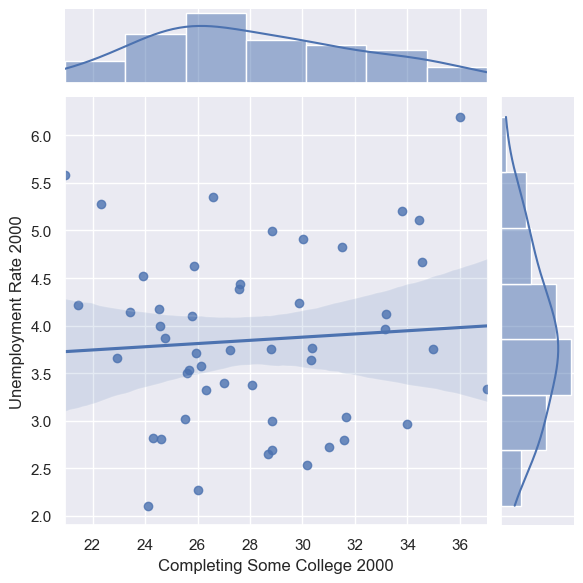

In [104]:
# Use Jointplot to show correlation between Unemployment Rate 2000 and Percent of adults with less than a high school diploma 2000

df2 = df_data_by_state[['State_x', '% Some College, 2000','Unemployment Rate 2000']].sort_values(by=['Unemployment Rate 2000'],ascending=False)

# Rename X-axis

df2 = df2.rename(columns = {"% Some College, 2000":"Completing Some College 2000"})

# Draw Jointplot

sns.jointplot(x='Completing Some College 2000',y='Unemployment Rate 2000',data=df2, kind = 'reg')



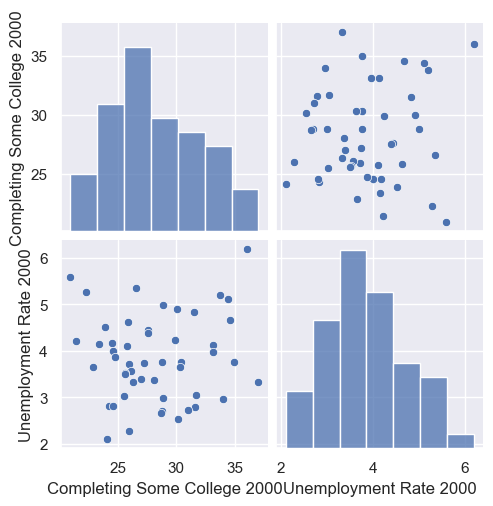

In [105]:
#Define Function for the the adults completing some college
def draw_pairplot(df):
    sns.pairplot(df)

#Draw pairplot
draw_pairplot(df2)

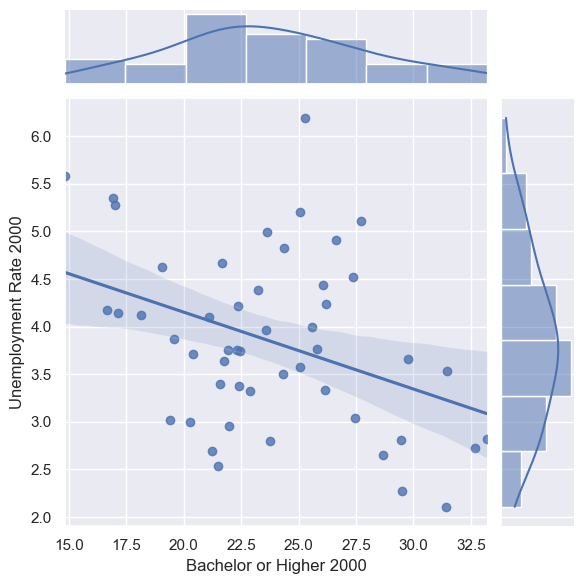

In [106]:
# Use Jointplot to show correlation between Unemployment Rate 2000 and Percent of adults with less than a high school diploma 2000

df3 = df_data_by_state[["State_x", "% >= Bachelors, 2000","Unemployment Rate 2000"]].sort_values(by=['Unemployment Rate 2000'],ascending=False)

# Rename it to a more formal name for the X Axis
df3 = df3.rename(columns = {"% >= Bachelors, 2000":"Bachelor or Higher 2000"})

# Draw the jointplot
sns.jointplot(x= "Bachelor or Higher 2000",y="Unemployment Rate 2000",data=df3, kind = 'reg')



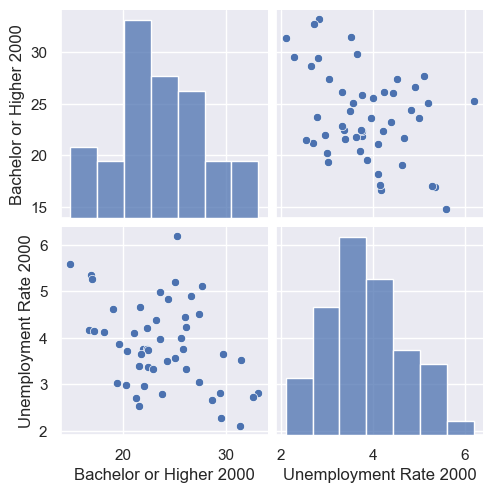

In [107]:
#Define Function
def draw_pairplot(df):
    sns.pairplot(df)

#Draw the pairplot
draw_pairplot(df3)

**Conclusion:** From the jointplot and pairplot of the percentage of adults who complete some college versus unemployment rate, we can see the weak correlation between the variables.In a way, we can see the slope slowly change toward the opposite direction.Obviously, the correlation between the percent of adults with a bachelor's degree or higher and unemployment rate displays a negative linear relationship. From the positive correlation between the percentage of adults with less than a high school diploma and unemployment rate to the negative correlation between percentage of the adults with a bachelor's degree or higher and unemployment rate, we can conclude there is correlation between the variables.

### Question 9: How has the civilian labor force changed in City/Suburb/Town/Rural areas from 2000, 2010 and 2020?

In [108]:
# Calculate the percent change in total labor force using the formula
# % Difference = [(New_value - Previous_value) / (Previous_value)] * 100%
# Define Function
def calculate(df_pt1):
    df_pt1['% 2000 to 2010 Change'] = ((df_pt1["Civilian labor force 2010"] - df_pt1["Civilian labor force 2000"]) / df_pt1["Civilian labor force 2000"]) * 100
    df_pt1['% 2010 to 2020 Change'] = ((df_pt1["Civilian labor force 2020"] - df_pt1["Civilian labor force 2010"]) / df_pt1["Civilian labor force 2010"]) * 100
    df_pt1['% 2000 to 2020 Change'] = ((df_pt1["Civilian labor force 2020"] - df_pt1["Civilian labor force 2000"]) / df_pt1["Civilian labor force 2000"]) * 100

    return df_pt1

In [109]:
# Create a pivot table stored in a new DataFrame that will provide the total civilian labor force for 
# the years 2000 and 2010
df_pt1 = pd.pivot_table(df_merged, index='City/Suburb/Town/Rural 2013', values=["Civilian labor force 2000", "Civilian labor force 2010","Civilian labor force 2020"], aggfunc='sum')

# Print Results
df_pt1
calculate(df_pt1)

,Civilian labor force 2000,Civilian labor force 2010,Civilian labor force 2020,% 2000 to 2010 Change,% 2010 to 2020 Change,% 2000 to 2020 Change
City/Suburb/Town/Rural 2013,,,,,,
City,120194652.0,131553875.0,138665536.0,9.450689,5.405892,15.367476
Rural,5447956.0,5454747.0,5153247.0,0.124652,-5.527296,-5.409533
Suburb,8545086.0,8708303.0,8439451.0,1.910069,-3.087306,-1.236208
Town,7394947.0,7531767.0,7249178.0,1.850182,-3.751962,-1.971197


Text(0, 0.5, 'Total Aggregate Population')

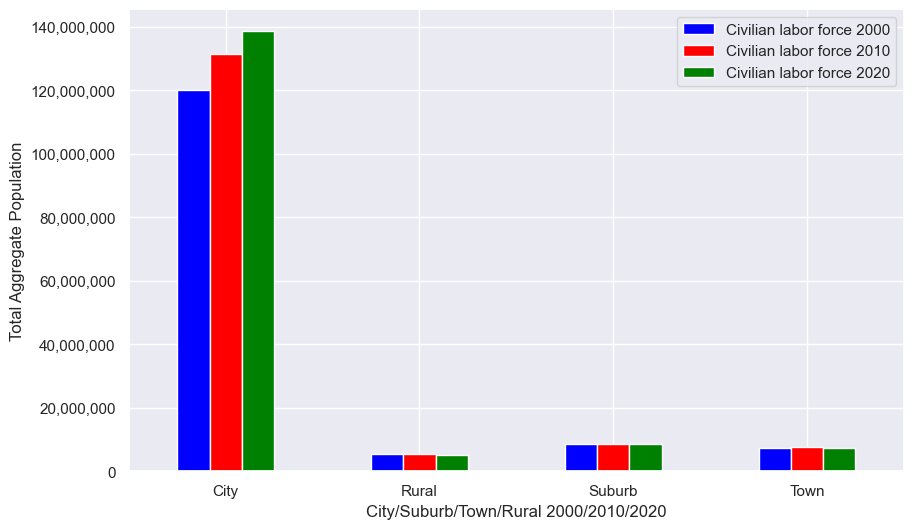

In [110]:
#Import requried library
import matplotlib as mpl

# Create a DataFrame to hold the aggregate population data aggregated by area (City/Suburb/Town/Rural)
# Show the total aggregate population for civilian labor force 2000 (blue), civilian labor force 2010 (red), civilian labor force 2020 (green)
df_pt1 = df_merged.groupby('City/Suburb/Town/Rural 2013')["Civilian labor force 2000","Civilian labor force 2010","Civilian labor force 2020"]

# Plot the aggregated population values based on area (City/Suburb/Town/Rural) 
ax = df_pt1.sum().plot.bar(color=['blue', 'red', 'green', 'cyan'])


# Modify the plot layout parameters
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#Label X and Y axes
ax.set_xlabel("City/Suburb/Town/Rural 2000/2010/2020")
ax.set_ylabel("Total Aggregate Population")


Conclusion: From the graph, we see the civilian labor force in City is increasing in a stable rate, but the civilian labor force in Suburb, Town and Rural are stay almost unchanged. In the last 10 years, our technology has grown rapidly. It may correlated to the growth in city population since most of the technology jobs are available in the city. People may need to relocate to cities in order to work in the technology industry. At the same time, higher education become essential. 

## Hypothesis Testing 

## Normal Test

#### Testing whether the data for "Unemployment rate 2000" is normally distributed or not.
#### H0 (Null Hypothesis): The data is normal distributed
#### H1 (Alternative Hypothesis): The data is not normal distributed

In [111]:
#Null Hypothesis can include =, <=, or => sign
#A general statement or default position that there is no relationship between two measured phenomena,
#or no association among groups

#Alternative Hypothesis can include NOT= or !=, >, or < sign
#It is the hypothesis used in hypothesis testing that is contrary to the Null hypothesis.

#Reference Website: https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

(Statistic, p_value) = stats.normaltest(df_merged['Unemployment rate 2000'])


In [112]:
#Print Result
print("Normal Test Result")

# 10 and 100 are the numbers behind decimal for Test Statistic and P-Value
print("Statistic is: ", round(Statistic,10))
print("P-Value is: ", round(p_value, 100))

#Print result which is either Accept or Reject, and it determined by P-Value.
if p_value < 0.05:
       print("Reject Null Hypothesis")
else:
       print("Accept Null Hypothesis")


Normal Test Result
Statistic is:  1204.3506327513
P-Value is:  0.0
Reject Null Hypothesis


Conclusion: The reason behind rejected Null Hypothesis is because P-Value is less than 0.05, so the unemployment rate for the year 2000 is not normal distributed. 

## Z-Test

###### Sample size is greater than 30. (N > 30)
###### Data points should be independent from each other
###### Data should be normally distributed, but for a large sample size (>30) this does not always matter
###### If the population standard deviation, sigma is known, then we use Z-Test
<br>$\begin{align}
  & {{H}_{0}}:\,\mu =\,{{\mu }_{0}} \\ 
 & {{H}_{1}}:\,\mu \ne {{\mu }_{0}} \\ 
\end{align}$<br>


In [113]:
#Test Z-Test
#Test the mean of the labor force in 2000 is 45,000 
#The Alternative Hypothesis is that the mean of the labor force in 2000 is NOT 45,000

(Statistic, p_value) = ztest(df_merged['Civilian labor force 2000'], value=45000, alternative='two-sided', ddof=1.0)

In [114]:
#Print results
print("Z-Test")

# 10 and 100 are the numbers behind decimal for Test Statistic and P-Value
#Evaluate Z-TEST STATISTIC AND P-VALUE
print("Test Statistic is: ", round(Statistic,10))
print("P-Value is: ", round(p_value, 100))

#Print result which is either Accept or Reject, and it determined by P-Value.
if p_value < 0.05:
       print("Reject Null Hypothesis")
else:
       print("Accept Null Hypothesis")
        

Z-Test
Test Statistic is:  0.1596475346
P-Value is:  0.8731587319927478
Accept Null Hypothesis


Conclusion: Since this P-Value of the Z-Test is greater than 0.05, we do not have sufficient evidence to reject the  null hypothesis. In other words, we conclude that the mean of the labor force in 2000 is 45,000.

## Correlation Test

## I have tested from Q1 and Q2. I also show the correlation test from calculation. 

Question 1: What is the correlation between the adults with less than a high school diploma 2000 and unemployment rate in the year of 2000?

Question 2: What will happen if the adults completing some college or even completing a bachelor's degree or higher 2000?

Null Hypothesis (H0): the two samples are independent.

Alternative Hypothesis (H1): there is a dependency between the samples.

Tested the correlation between 
1. The percent of adults with less than a high school diploma and unemployment rate in the year of 2000

Null Hypothesis (H0): The percent of adults with less than a high school diploma and unemployment rate in the year of 2000 are independent.

Alternative Hypothesis (H1): There is a dependency between the percent of adults with less than a high school diploma and unemployment rate in the year of 2000.

2. The percent of adults completing some college and unemployment rate in the year of 2000

Null Hypothesis (H0): The percent of adults completing some college and unemployment rate in the year of 2000 are independent.

Alternative Hypothesis (H1): There is a dependency between the percent of adults completing some college and unemployment rate in the year of 2000.

3. The percent of adults with a bachelor's degree or higher and unemployment rate in the year of 2000

Null Hypothesis (H0): The percent of adults with a bachelor's degree or higher and unemployment rate in the year of 2000 are independent.

Alternative Hypothesis (H1): There is a dependency between the percent of adults with a bachelor's degree or higher and unemployment rate in the year of 2000.


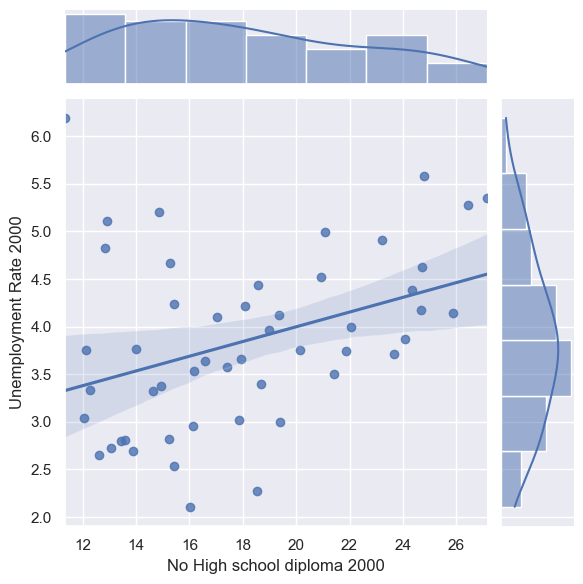

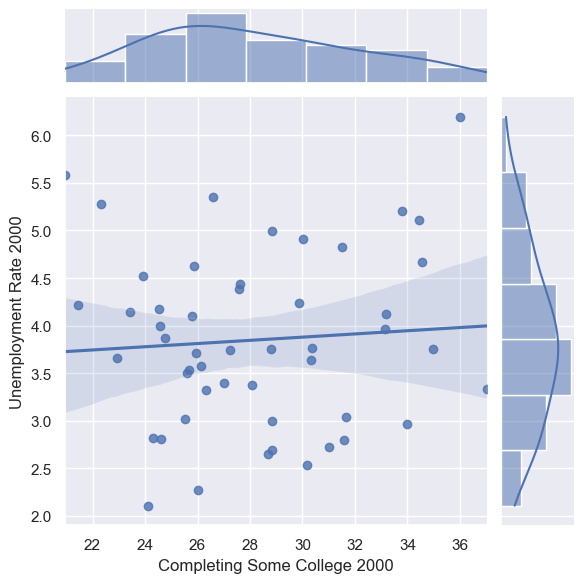

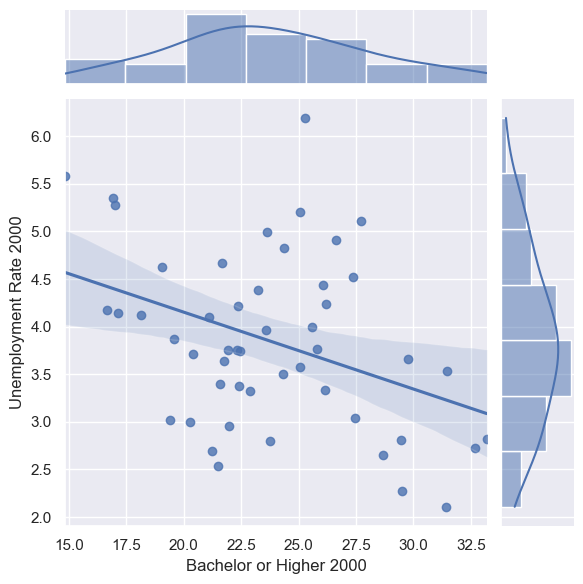

In [115]:
# Show Correlation between 
# 1. The percent of adults with less than a high school diploma and unemployment rate in the year of 2000
df1 = df_data_by_state[['State_x', '% < HS Diploma, 2000','Unemployment Rate 2000']].sort_values(by=['Unemployment Rate 2000'],ascending=False)

df1 = df1.rename(columns = {"% < HS Diploma, 2000":"No High school diploma 2000"})
sns.jointplot(x='No High school diploma 2000',y='Unemployment Rate 2000',data=df1, kind = 'reg')
# Positive Correlation 


# Show Correlation between
# 2. The percent of adults completing some college and unemployment rate in the year of 2000
df2 = df_data_by_state[['State_x', '% Some College, 2000','Unemployment Rate 2000']].sort_values(by=['Unemployment Rate 2000'],ascending=False)

df2 = df2.rename(columns = {"% Some College, 2000":"Completing Some College 2000"})
sns.jointplot(x='Completing Some College 2000',y='Unemployment Rate 2000',data=df2, kind = 'reg')
#Very slight positive correlation to almost no correlation


# Show Correlation between 
# 3. The percent of adults with a bachelor's degree or higher and unemployment rate in the year of 2000
df3 = df_data_by_state[["State_x", "% >= Bachelors, 2000","Unemployment Rate 2000"]].sort_values(by=['Unemployment Rate 2000'],ascending=False)

df3 = df3.rename(columns = {"% >= Bachelors, 2000":"Bachelor or Higher 2000"})
sns.jointplot(x= "Bachelor or Higher 2000",y="Unemployment Rate 2000",data=df3, kind = 'reg')
#Negative Correlation


In [116]:
# Tested the correlation between 
# 1. The percent of adults with less than a high school diploma and unemployment rate in the year of 2000
corr, p = pearsonr(df_merged["Unemployment rate 2000"], df_merged["% < HS Diploma, 2000"])

print(f"Correlation coefficient: {corr}, P-value: {p}")

Correlation coefficient: 0.4852579122415984, P-value: 7.097382052376354e-184


In [117]:
# 2. The percent of adults completing some college and unemployment rate in the year of 2000
corr, p = pearsonr(df_merged["Unemployment rate 2000"], df_merged["% Some College, 2000"])

print(f"Correlation coefficient: {corr}, P-value: {p}")

Correlation coefficient: -0.24359426787193705, P-value: 2.4492868410404643e-43


In [118]:
# 3. The percent of adults with a bachelor's degree or higher and unemployment rate in the year of 2000
corr, p = pearsonr(df_merged["Unemployment rate 2000"], df_merged["% >= Bachelors, 2000"])

print(f"Correlation coefficient: {corr}, P-value: {p}")

Correlation coefficient: -0.3856131212048477, P-value: 4.719921080791591e-111


###### Conclusion from the Statistics side: 
All of the P-Value are extremely close to zero. Since P-Value is less than 0.001, so there is strong eveidence for correlation.

###### Conclusions of the correlation between two samples: 
1. The percent of adults with less than a high school diploma and unemployment rate in the year of 2000
Reject the Null Hypothesis (H0) and accept Alternative Hypothesis (H1) because it does reveal a positive correlation betwee the two samples in the graph. 

2. The percent of adults completing some college and unemployment rate in the year of 2000
Accept the Null Hypothesis (H0) and reject the Alternative Hypothesis (H1) because it does reveal a very slightly positive correlation to almost no correlation betwee the two samples in the graph. 

3. The percent of adults with a bachelor's degree or higher and unemployment rate in the year of 2000
Reject the Null Hypothesis (H0) and accept Alternative Hypothesis (H1) because it does reveal a negative correlation betwee the two samples in the graph. 


## Chi-Square Test 

###### H0: "Percent of adults completing some college 2000" and "Unemployment rate 2000" are independent.

###### H1: "Percent of adults completing some college 2000" and "Unemployment rate 2000" are dependent.

###### H0: "Percent of adults with a bachelor's degree or higher 2000" and "Unemployment rate 2000" are independent.

###### H1: "Percent of adults with a bachelor's degree or higher 2000" and "Unemployment rate 2000" are dependent.

In [119]:
# Reference Website (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)
# Reference Website (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

# import required libraries 
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

table = df_merged["% Some College, 2000"], df_merged["Unemployment rate 2000"]

#print(table)
stat, p, dof, expected = chi2_contingency(table)

print('Test statistic: ', stat)
print('P-value: ', p)
print('Degrees of freedom (dof):', dof)
print('expected values:', expected)

#Set probability equal to 95%
prob = 0.95
critical_value = chi2.ppf(prob, dof)

# Print the probability, critical value
print('Probability: ', prob)
print('Critical value: ', critical_value)

# Evaluate the test statistic
print('Evaluate the test statistic:')
if abs(stat) >= critical_value:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')

# Evaluate the P-value
print('Evaluate the P-value:')
alpha = 1.0 - prob
print('Significance: ', alpha)
if p <= alpha:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')


Test statistic:  2870.8631293077046
P-value:  0.9992689958224099
Degrees of freedom (dof): 3116
expected values: [[22.1115117  24.25410004 21.25447636 ... 28.28216613 32.56734282
  31.45319688]
 [ 3.6884883   4.04589996  3.54552364 ...  4.71783387  5.43265718
   5.24680312]]
Probability:  0.95
Critical value:  3246.976756354243
Evaluate the test statistic:
Independent (fail to reject H0)
Evaluate the P-value:
Significance:  0.050000000000000044
Independent (fail to reject H0)


In [120]:
# Reference Website (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)
# Reference Website (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

# import required libraries 
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

table = df_merged["% >= Bachelors, 2000"], df_merged["Unemployment rate 2000"]

#print(table)
stat, p, dof, expected = chi2_contingency(table)

print('Test statistic: ', stat)
print('P-value: ', p)
print('Degrees of freedom (dof):', dof)
print('expected values:', expected)

#Set probability equal to 95%
prob = 0.95
critical_value = chi2.ppf(prob, dof)

# Print the probability, critical value
print('Probability: ', prob)
print('Critical value: ', critical_value)

# Evaluate the test statistic
print('Evaluate the test statistic:')

#Print Result (Reject or Fail to Reject H0)
if abs(stat) >= critical_value:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')

# Evaluate the P-value
print('Evaluate the P-value:')
alpha = 1.0 - prob

# Evaluate Significance Value
print('Significance: ', alpha)

# Print results (Reject or Fail to reject H0)
if p <= alpha:
  print('Dependent (reject H0)')
else:
  print('Independent (fail to reject H0)')

Test statistic:  4742.658884176255
P-value:  1.8973530558983913e-71
Degrees of freedom (dof): 3116
expected values: [[ 9.88848472 10.36313198 11.23331864 ... 17.79927249 16.45443857
  14.95138889]
 [ 2.61151528  2.73686802  2.96668136 ...  4.70072751  4.34556143
   3.94861111]]
Probability:  0.95
Critical value:  3246.976756354243
Evaluate the test statistic:
Dependent (reject H0)
Evaluate the P-value:
Significance:  0.050000000000000044
Dependent (reject H0)


###### Conclusion: 
According to Paul's work, we fail to reject the null hypothesis which is "Percent of adults with less than a high school diploma, 2000" and "Unemployment rate 2000". Extending from there, by Chi-Square Test, we fail to reject Null Hypothesis which is "Percent of adults completing some college 2000" and "Unemployment rate 2000" are independent. We reject the "Percent of adults with a bachelor's degree or higher 2000" and "Unemployment rate 2000" are independent (H0), so I was able to confirm that "Percent of adults with a bachelor's degree or higher 2000" and "Unemployment rate 2000" are dependent.

## ANOVA

###### ANOVA test returns two values:
###### F-test score: variation between sample group means divided by variation within sample group. 
###### P-value: Confidence degree. The p-value shows whether the obtained result is statistically significant

Null Hypothesis (H0):In City, Suburb, Rural, and Town areas, there is no difference in the mean percentage of adults with the adults who completing Some College 2000.

Alternative Hypothesis (H1): In City, Suburb, Rural, and Town areas, there is difference in the mean percentage of adults with the adults who completing Some College 2000.

Null Hypothesis (H0):In City, Suburb, Rural, and Town areas, there is no difference in the mean percentage of adults with the adults with a bachelor's degree or higher 2000.

Alternative Hypothesis (H1): In City, Suburb, Rural, and Town areas, there is difference in the mean percentage of adults with the adults with a bachelor's degree or higher 2000.

In [121]:
#Show Groups
df_anova = df_merged[["City/Suburb/Town/Rural 2013","% Some College, 2000"]]

# Group the annova dataframe by area type (City/Suburb/Town/Rural 2013)
df_anova_groupby_area = df_anova.groupby(['City/Suburb/Town/Rural 2013'])

anova_result_1 = stats.f_oneway(df_anova_groupby_area.get_group("City")["% Some College, 2000"], 
                                df_anova_groupby_area.get_group("Suburb")["% Some College, 2000"],
                                df_anova_groupby_area.get_group("Rural")["% Some College, 2000"],
                                df_anova_groupby_area.get_group("Town")["% Some College, 2000"])

print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=21.864460890602306, pvalue=5.211724676158826e-14)


In [122]:
#Dataframe
df_anova = df_merged[["City/Suburb/Town/Rural 2013","% >= Bachelors, 2000"]]

# Group the annova dataframe by area type (City/Suburb/Town/Rural 2013)
df_anova_groupby_area = df_anova.groupby(['City/Suburb/Town/Rural 2013'])

anova_result_1 = stats.f_oneway(df_anova_groupby_area.get_group("City")["% >= Bachelors, 2000"], 
                                df_anova_groupby_area.get_group("Suburb")["% >= Bachelors, 2000"],
                                df_anova_groupby_area.get_group("Rural")["% >= Bachelors, 2000"],
                                df_anova_groupby_area.get_group("Town")["% >= Bachelors, 2000"])

#Print Result
print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=166.12955659067728, pvalue=6.804715210427925e-100)


###### Conclusion:

According to the ANOVA results, both F-statistic is larger than 1 and both P-Value is much less than 0.05. This reveals the evidence to reject the null hypotheses. 

Reject -> Null Hypothesis (H0):In City, Suburb, Rural, and Town areas, there is no difference in the mean percentage of adults with the adults who completing Some College 2000.

Acccept -> Alternative Hypothesis (H1): In City, Suburb, Rural, and Town areas, there is difference in the mean percentage of adults with the adults who completing Some College 2000.

Reject -> Null Hypothesis (H0):In City, Suburb, Rural, and Town areas, there is no difference in the mean percentage of adults with the adults with a bachelor's degree or higher 2000.

Acccept -> Alternative Hypothesis (H1): In City, Suburb, Rural, and Town areas, there is difference in the mean percentage of adults with the adults with a bachelor's degree or higher 2000.


## Project Summary: Answers to the Stated Questions

#### 1\. A charity organization wants to explore which communities have residents that need help in completing their high school education. Which communities should they look at to do the most good? (Paul)  
The results of the ANOVA test show that there is a significant difference in City, Suburb, Rural and Town areas when looking for people with less than a high school diploma. The results of the Pearson Correlation test show a correlation between a county’s unemployment rate and residents having less than a high school diploma. Looking at the U.S. map, one can see that Louisiana, Mississippi, Tennessee and Kentucky all have a large percentage of residents with less than a high school diploma, and also have high unemployment. The residents in those states show the greatest need. 

#### 2\. Even in U.S. states with low or moderate unemployment rates, are there counties with unusually high or low unemployment? (Paul)
Yes. In the chart “Boxplot Showing County Ranges of Unemployment, 2000” it is clear that several states have counties representing outliers for high unemployment. Notably Texas with a median unemployment rate of about 5%, there are counties with double-digit unemployment, with one county as high as 17%.  However, in all fifty states, only Massachusetts and Wyoming had outliers representing counties with unusually low unemployment rates compared with the state median unemployment rate.



#### 3\. Does having a bachelor's degree (or higher) or just a high school diploma correlate better with low unemployment? (Paul)
Having a bachelor's degree (or higher) correlates better with lower unemployment.  Unemployment is negatively correlated with having a bachelor's degree (-0.381) and having only a high school diploma (-0.0725). but the negative correlation is stronger for having the bachelor’s degree or higher.

In other words, the higher the level of education in a county, the lower the unemployment rate will be. 

#### 4\. Which years have the highest and lowest unemployment rate over the course of 21 years? (Fiona)
From year 2000 to 2020, 2010 has the highest unemployment rate 9.64%, while 2019 has the lowest unemployment rate 3.66%. However, there was a great increase on unemployment rate in year 2020.

#### 5\. Which states contribute the most and the least for the unemployment change from year 2019 to 2020? (Fiona)
All The states have increased unemployment rate from year 2019 to 2020. The five states that have the highest unemployment rate increases are Hawaii, Nevada, Massachusetts, New Jersey, Colorado. While the five states that have the lowest unemployment rate increases are Nebraska, Alaska, Mississippi, South Dakota, and Wyoming. The ECDF plot shows almost 50% of the states have unemployment rate changes which are higher than 100%.

#### 6\. Is there a significant change regarding percentages of people completing different diplomas between year 2000 and year 2015-2019? (Fiona)
There is a significant change in the percentages of people completing different diplomas between year 2000 and year 2015-2019, with more people having bachelor's degree or higher, and fewer people having less than a high school diploma. However, the percentages of people with high school diploma only and college or associate's degree don't have too much difference.  hat is the correlation between the adults with less than a high school diploma 2000 and unemployment rate in the year of 2000? (Ping)
(Answer)

#### 7\. What is the correlation between the adults with less than a high school diploma and unemployment rate in the year 2000? (Ping)
From the jointplot, pairplot, and hypothesis test, I found a positive correlation between the percentage of adults with less than a high school diploma and unemployment rate. It displays a positive slope. We cannot conclude that one affects the other, but we do see that as the percentage of adults with less than a high school diploma increases, the unemployment rate increases. We can conclude that there is dependency (Correlation) between the two variables. At the end, the Chi-Square Test’s result also confirmed that the two variables are dependent. 

#### 8\. What will happen if the adults complete some college or complete a bachelor's degree or higher in the year 2000? (Ping)
From the jointplot and pairplot of the percentage of adults completing some college versus unemployment rate, we can see the weak positive correlation between the variables. In a way, we can see the slope slowly change toward the opposite direction. Then, the correlation between the percent of adults with a bachelor's degree or higher and unemployment rate displays a negative linear relationship. Also, I did Hypothesis Tests and Chi-Square Tests to support my conclusion from the plots.
From the positive correlation between the percentage of adults with less than a high school diploma and unemployment rate to the negative correlation between the percentage of the adults with a bachelor's degree or higher and unemployment rate. We can see strong evidence of dependency. 

#### 9\. How has the civilian labor force changed in City/Suburb/Town/Rural areas from 2000, 2010 and 2020? (Ping)
Civilian labor force for cities reveals a steady growth, but there is almost no changes in Suburb/Town/Rural areas. I want to find the reasons behind the results of the dependency for the variables from my previous two questions, so I start to search for the reasons from a different angle. In the last 20 years, our technology has grown rapidly which led to the changes in the job market. Many people are forced to go back to school in order to be able to get technology related jobs. Tech companies are usually located in cities, and it might be a major reason leading to the increasing population in cities. From this perspective, the more educated people get, then they will have higher job opportunities. This supports the correlation between the various education levels versus unemployment rate.   
